<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1748]:
# import the pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

### Step 1: Load Data into Jupyter Notebook

In [1749]:
data = pd.read_csv('./song_popularity.csv')
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


In [1750]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [1751]:
data.describe()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
count,1.883500e+04,18835.000000,15938.000000,18835.000000,18835.000000,18835.000000,18835.000000,13184.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.253368,0.626669,64.499476,0.078008,5.289196,0.628139,152.173475,121.073154,0.527967,-7.447435,42.357670,96.749215
std,5.988754e+04,0.282945,0.155086,21.410076,0.221591,3.614595,0.483314,155.018531,28.714456,0.244632,3.827831,13.949829,32.115110
min,1.200000e+04,0.000001,0.000000,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.768000,0.000000,0.160000
25%,1.843395e+05,0.023618,0.526680,51.000000,0.000000,2.000000,0.000000,56.700000,98.368000,0.335000,-9.044000,32.790000,76.500000
50%,2.113060e+05,0.129360,0.636570,67.400000,0.000011,5.000000,1.000000,83.250000,120.013000,0.527000,-6.555000,42.730000,101.100000
75%,2.428440e+05,0.415520,0.740520,81.500000,0.002570,8.000000,1.000000,177.000000,139.931000,0.725000,-4.908000,52.290000,122.250000
max,1.799346e+06,0.976080,0.977130,99.900000,0.997000,11.000000,1.000000,1410.000000,242.318000,0.984000,1.585000,99.320000,149.850000


In [1752]:
data.isnull().sum()

Code                   0
Song_Name              0
Song_Duration_ms       0
Acousticness           0
Danceability        2897
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         5651
Tempo                  0
Audio_valence          0
Dynamism            3698
Decibel                0
Loudness               0
Song_Popularity        0
Indicator              0
dtype: int64

In [1753]:
data.nunique()

Code                  186
Song_Name           13070
Song_Duration_ms    11771
Acousticness         3207
Danceability          834
Energy               1132
Instrumentalness     3925
Key                    12
Liveness             1426
Audio_mode              2
Speechiness          1193
Tempo               12112
Audio_valence        1246
Dynamism               11
Decibel              8416
Loudness               19
Song_Popularity      5149
Indicator            1127
dtype: int64

In [1754]:
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
data[cat_cols].head()

,Code,Song_Name,Liveness,Dynamism,Loudness
0,HI8,Boulevard of Broken Dreams,112.126921,High,Blare
1,HI10,In The End,122.7664,high,Roar
2,MI11,Seven Nation Army,157.5025,Med,Roar
3,EI8,By The Way,121.4404,Extra,Blare
4,HI9,How You Remind Me,123.8769,Hi,Blare


In [1755]:
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
data[cat_cols].isnull().mean().sort_values()

Code         0.000000
Song_Name    0.000000
Liveness     0.000000
Loudness     0.000000
Dynamism     0.196337
dtype: float64

In [1756]:
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.000000
Acousticness        0.000000
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Audio_mode          0.000000
Tempo               0.000000
Audio_valence       0.000000
Decibel             0.000000
Song_Popularity     0.000000
Indicator           0.000000
Danceability        0.153809
Speechiness         0.300027
dtype: float64

In [1757]:
data.dtypes

Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness             object
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

In [1758]:
duplicates = data[data.duplicated("Song_Name", keep=False)]
print(duplicates)

       Code                   Song_Name  Song_Duration_ms  Acousticness  \
0       HI8  Boulevard of Broken Dreams            262333      0.005410   
2      MI11           Seven Nation Army            231733      0.008007   
4       HI9           How You Remind Me            223826      0.000935   
6       HI7                 Last Resort            199893      0.000494   
7       EI7    Are You Gonna Be My Girl            213800      0.001450   
...     ...                         ...               ...           ...   
18817  MI15           Life Is Confusing            171413      0.935900   
18826  MI13            Call It Dreaming            231760      0.597800   
18828  MI15      Build Me Up From Bones            216173      0.844760   
18829  MI11                      I Know            195106      0.387100   
18831  LI18                     Answers            205666      0.749700   

       Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0           0.49104  

### Step 2: Exploratory Data Analysis

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Audio_mode'}>,
        <Axes: title={'center': 'Speechiness'}>],
       [<Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Song_Popularity'}>],
       [<Axes: title={'center': 'Indicator'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

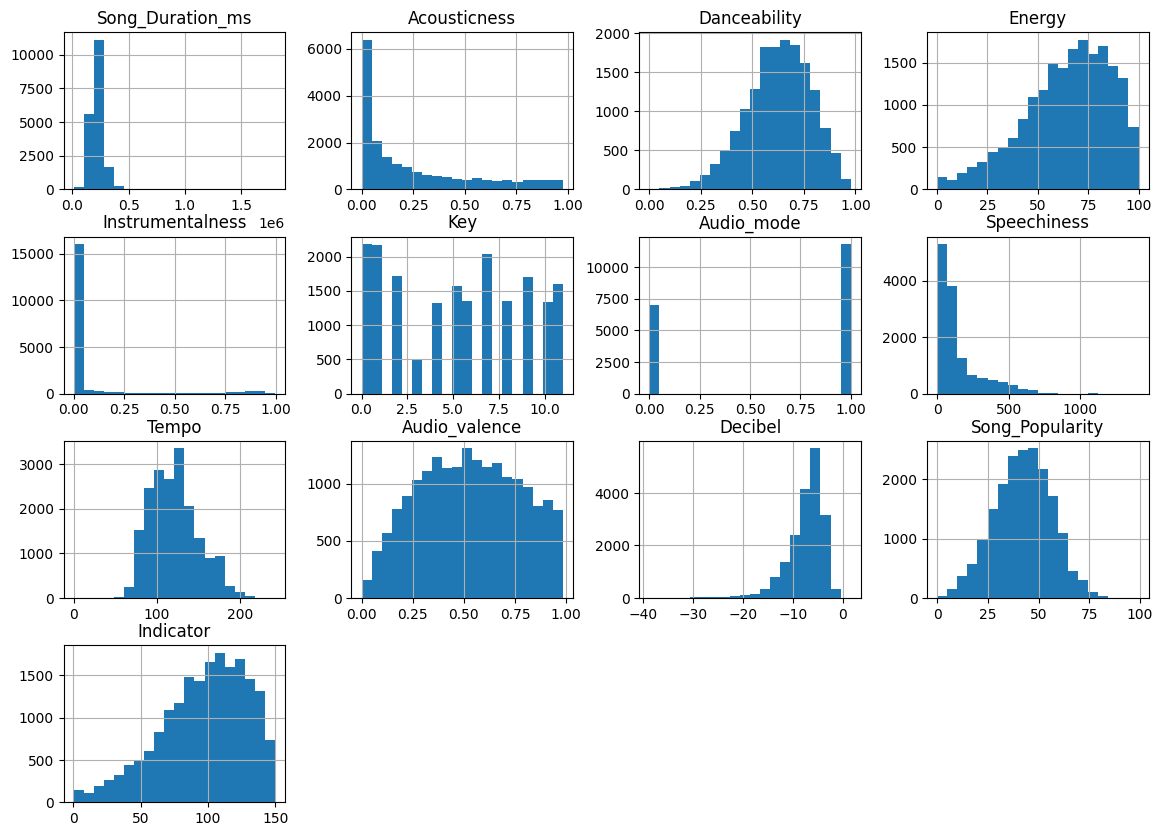

In [1759]:
data.hist(bins=20, figsize=(14, 10))

In [1760]:
def diagnostic_plots(df, variable):
    if pd.api.types.is_numeric_dtype(df[variable]):
        plt.figure(figsize=(15,6))
        
        plt.subplot(1, 1, 1)
        df[variable].plot(kind='box')
        plt.title(f'Box Plot of {variable}')
        plt.xlabel('')
        plt.ylabel(variable)
        
        plt.tight_layout()
        plt.show()

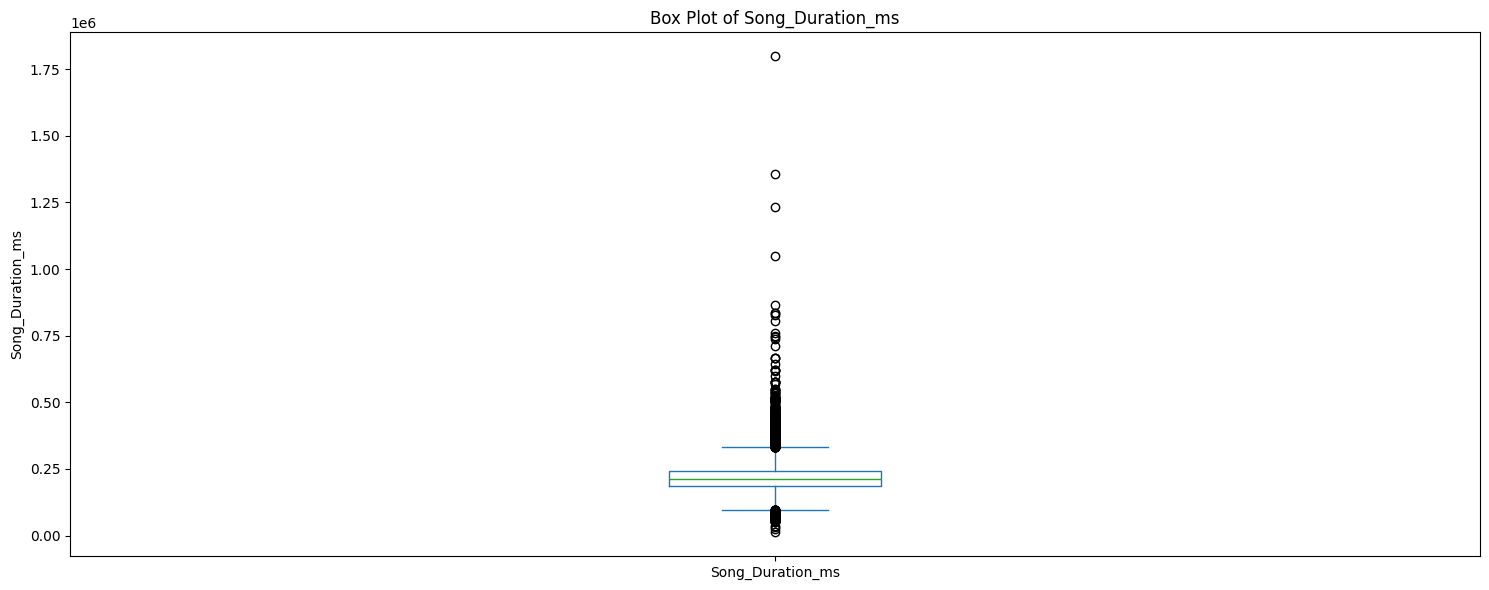

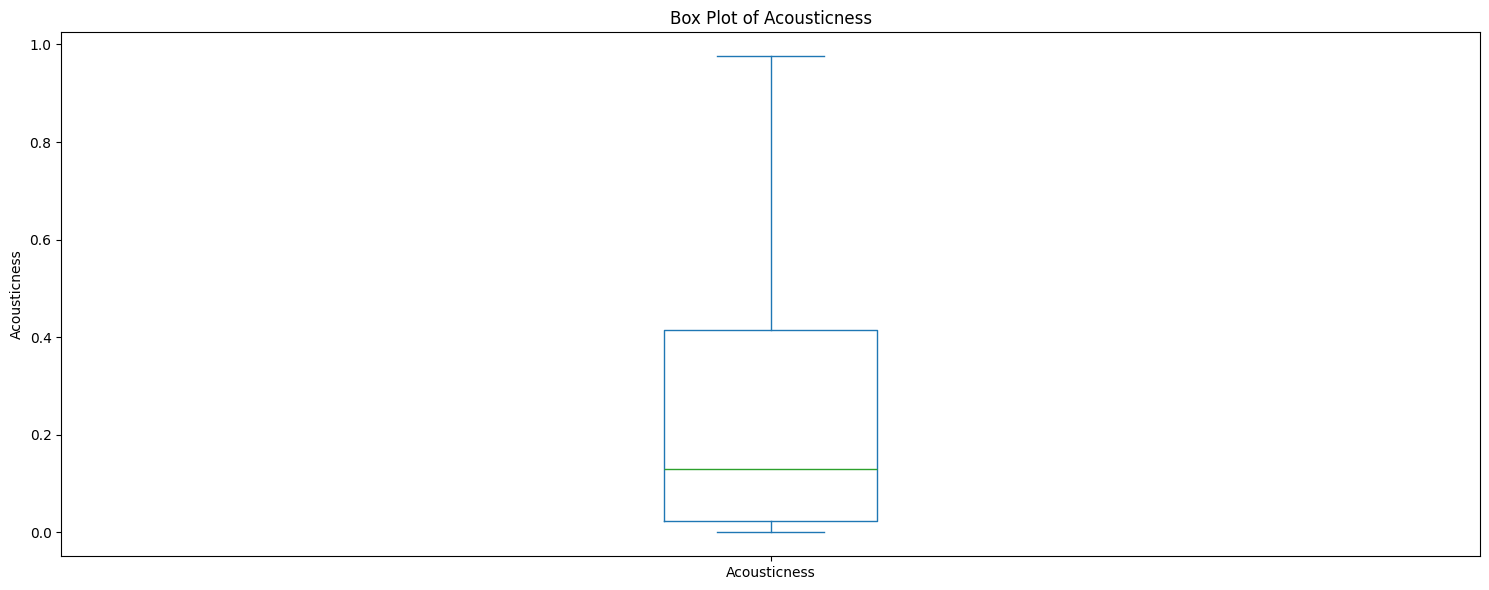

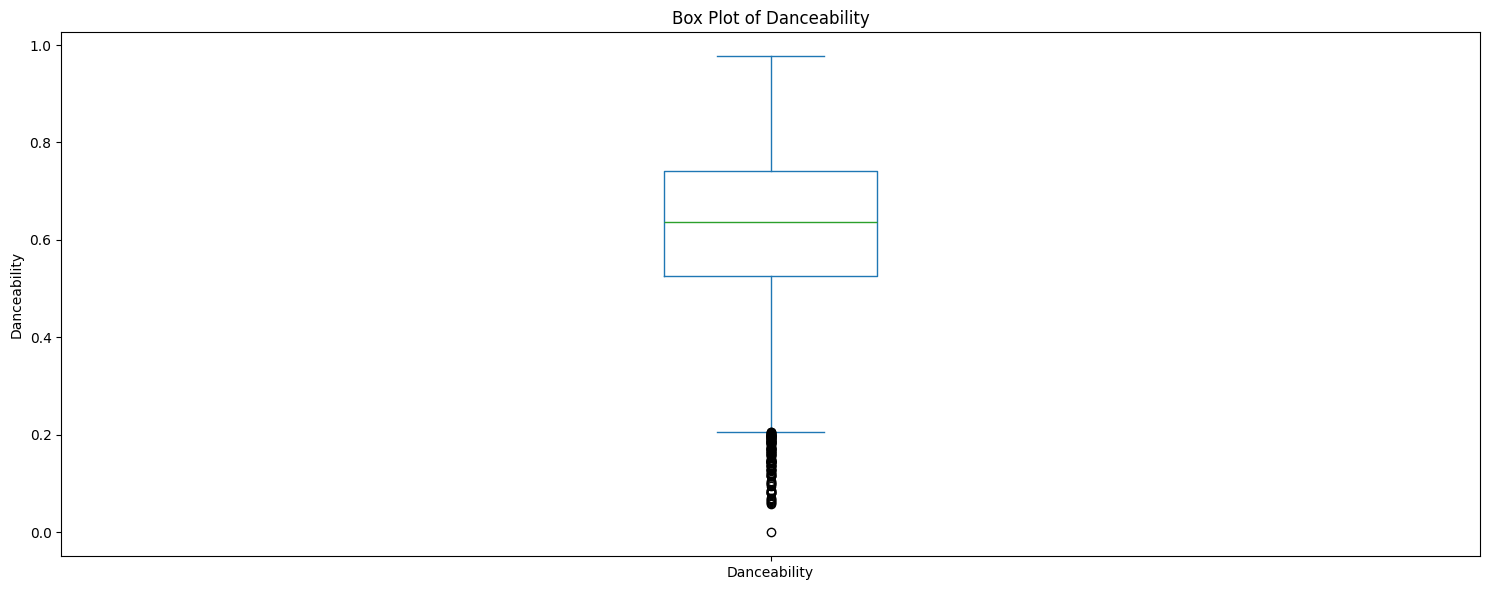

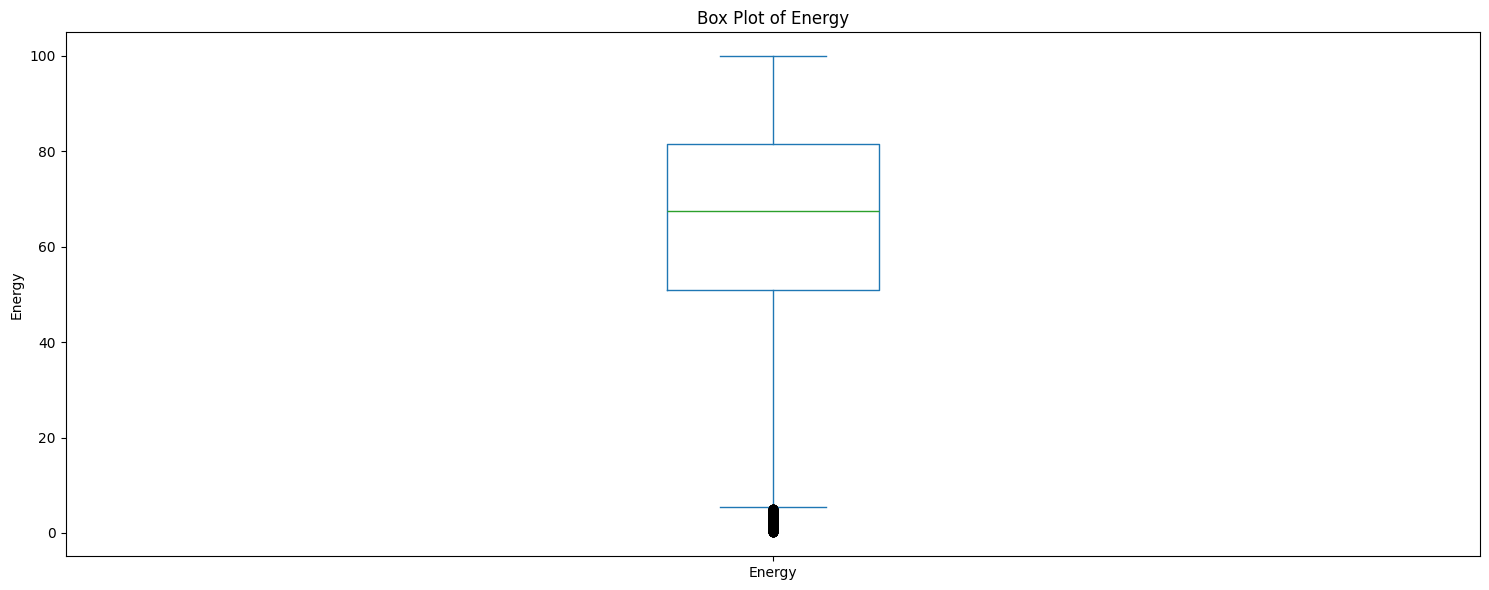

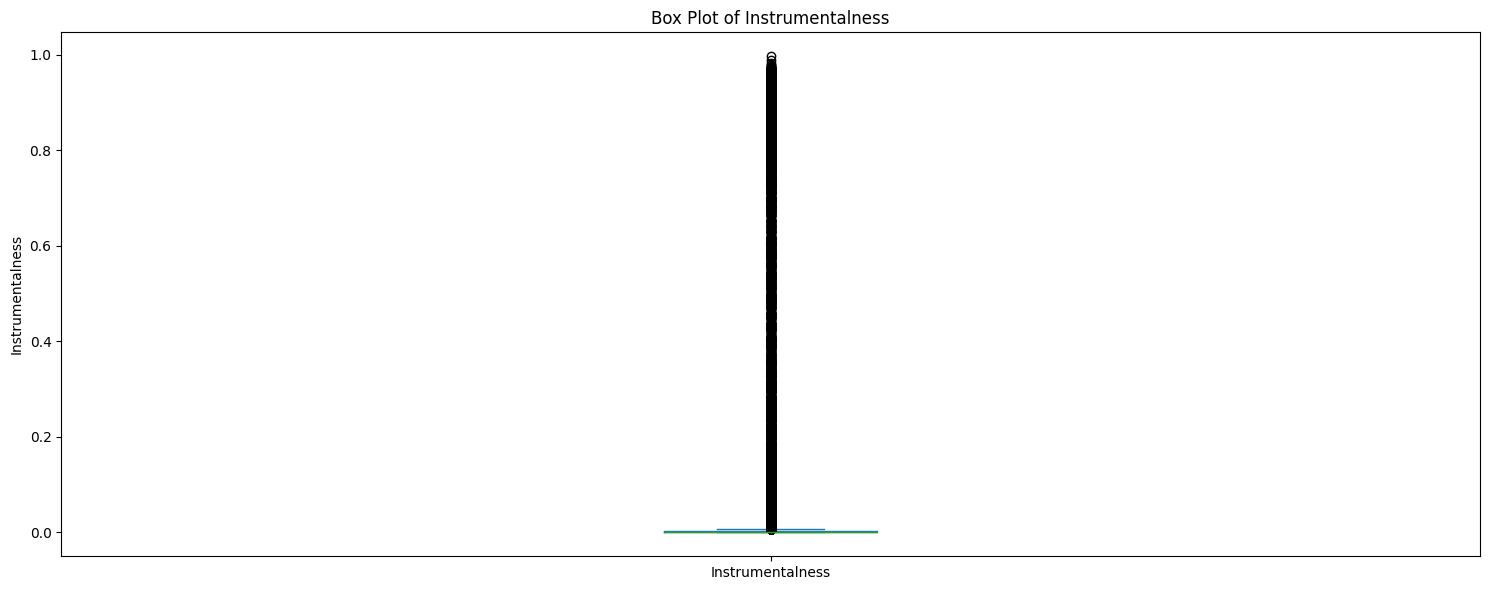

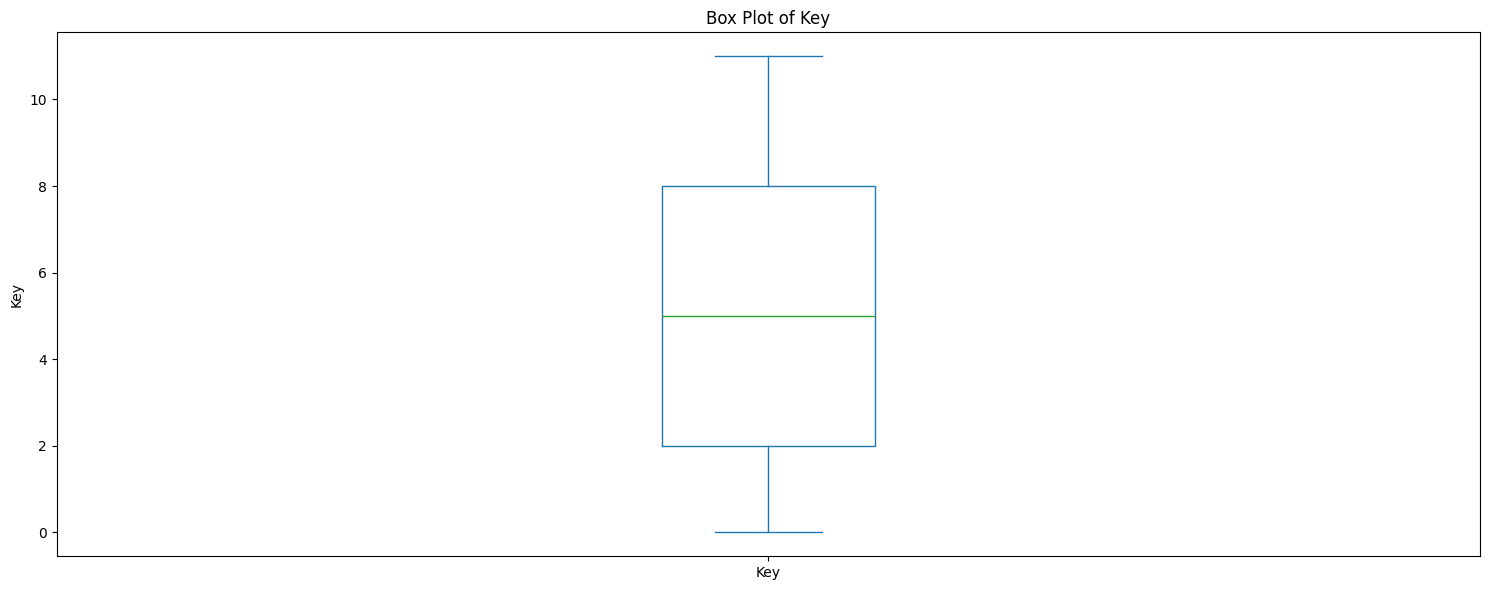

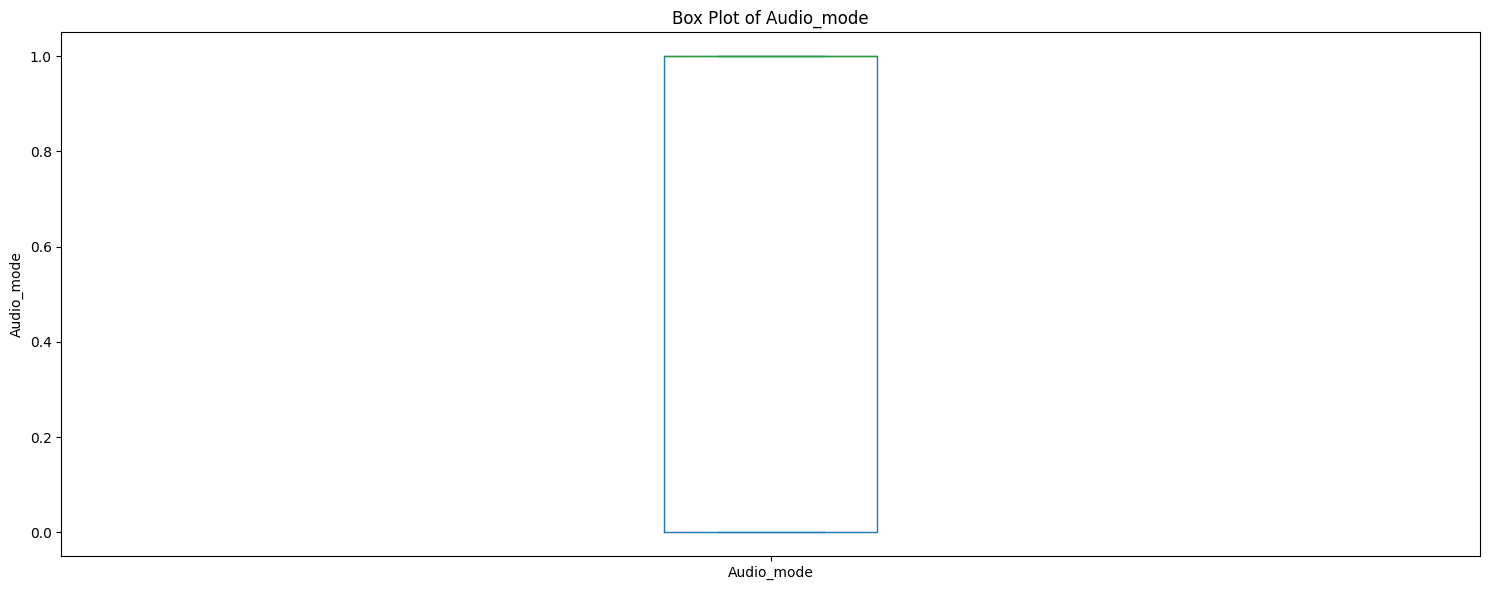

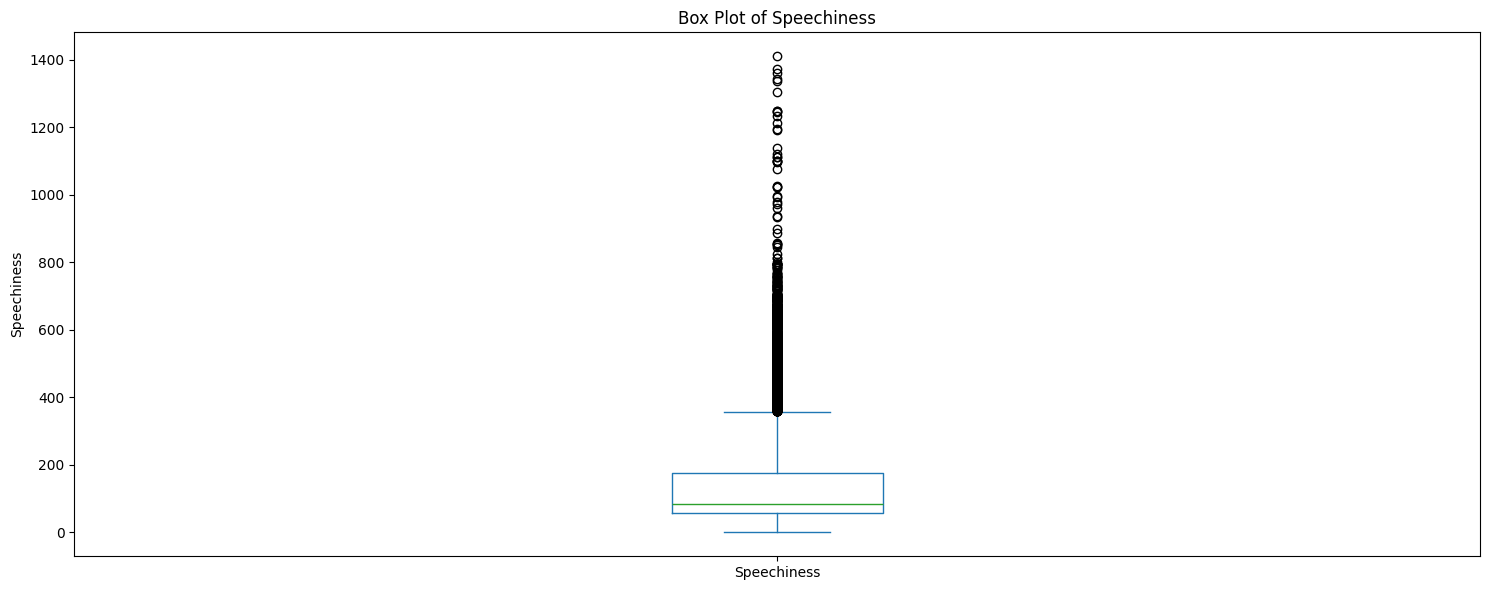

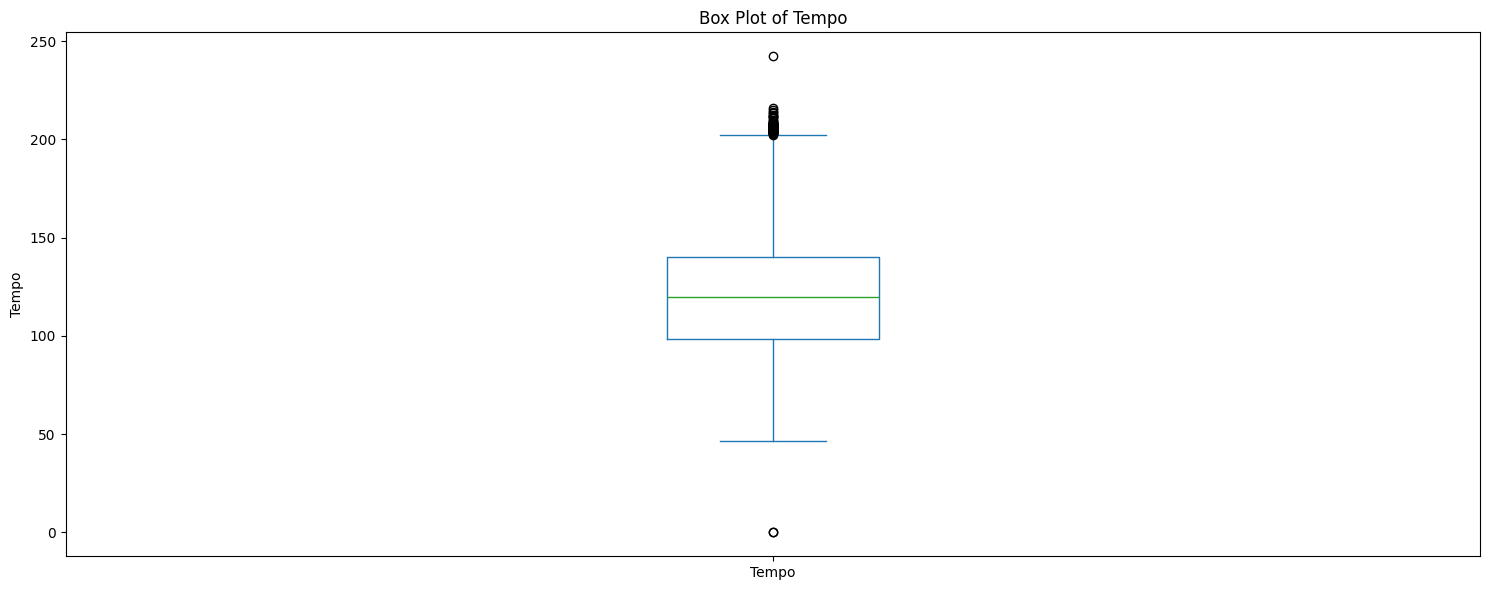

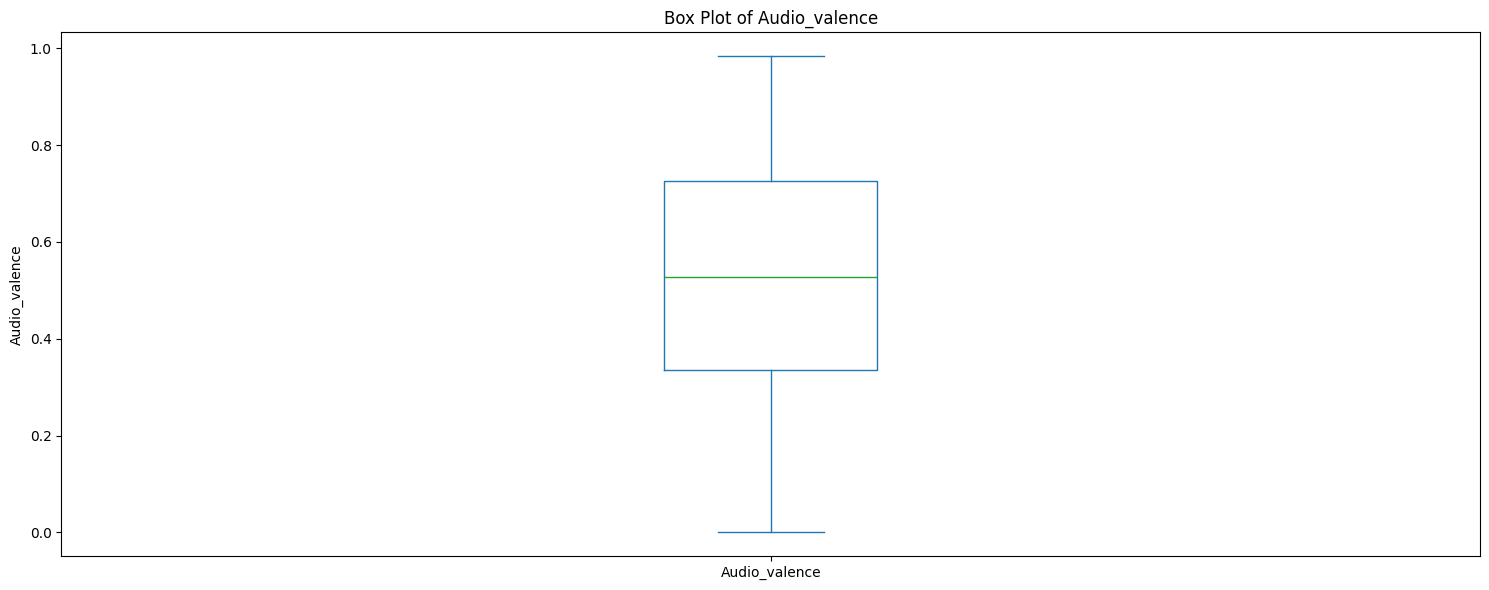

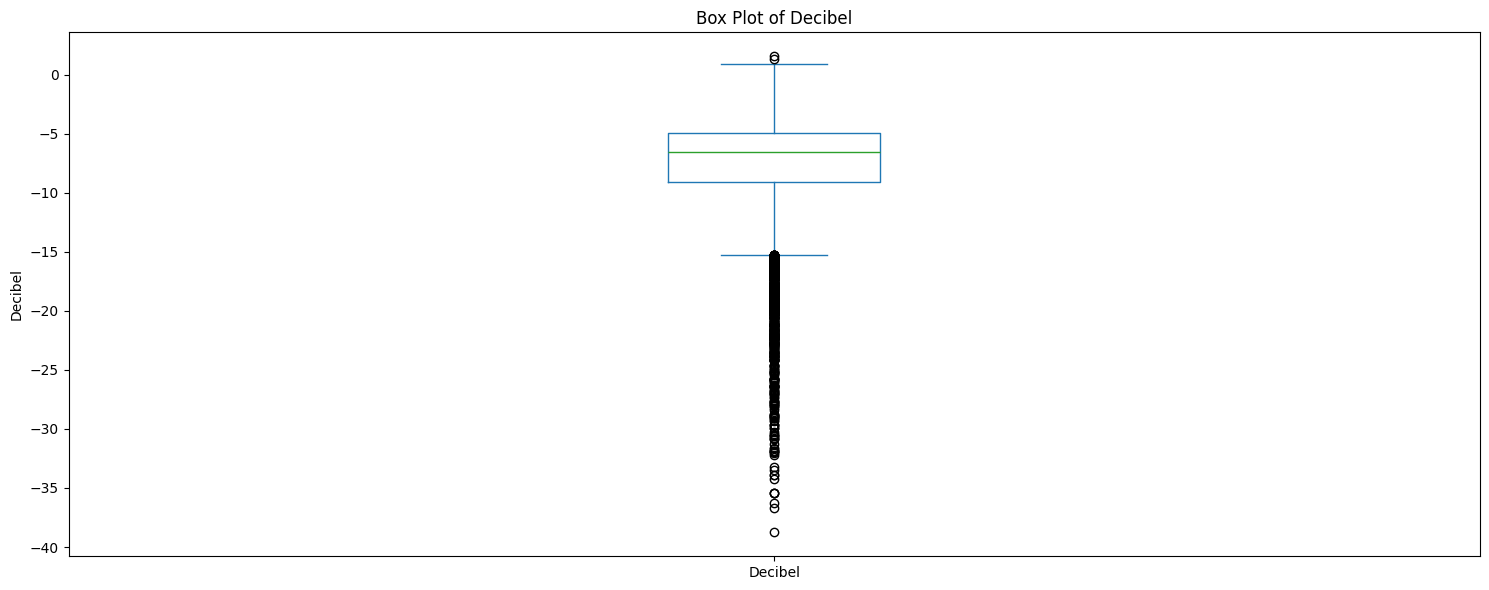

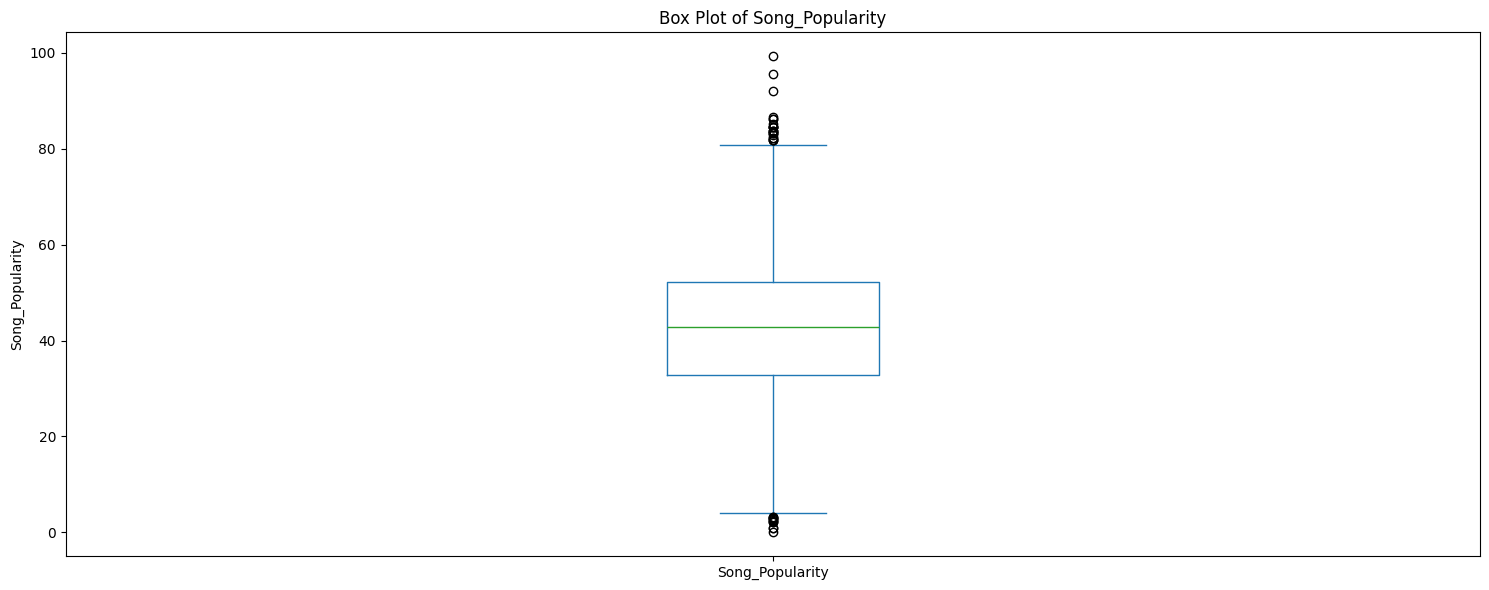

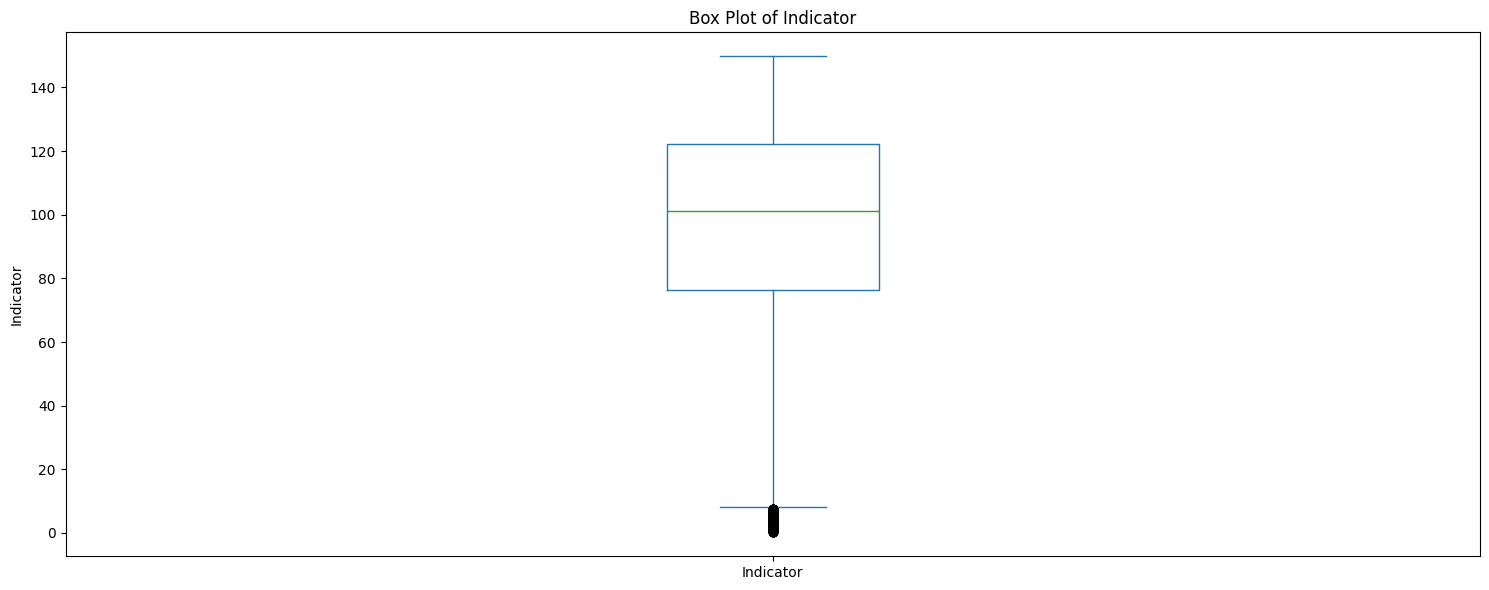

In [1761]:
for variable in data.columns:
    diagnostic_plots(data, variable)

In [1762]:
def plot_rare_categories(df, variable, threshold=0.05):
    # Calculate the frequency of each category
    freq = df[variable].value_counts(normalize=True)
    
    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    freq.plot(kind='bar')
    
    # Add a horizontal line for the threshold
    plt.axhline(y=threshold, color='r', linestyle='--')
    
    # Add title and labels
    plt.title(f'Bar Plot of {variable} with Rare Category Threshold')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()
    
    rare_categories = freq[freq < threshold].index
    return rare_categories

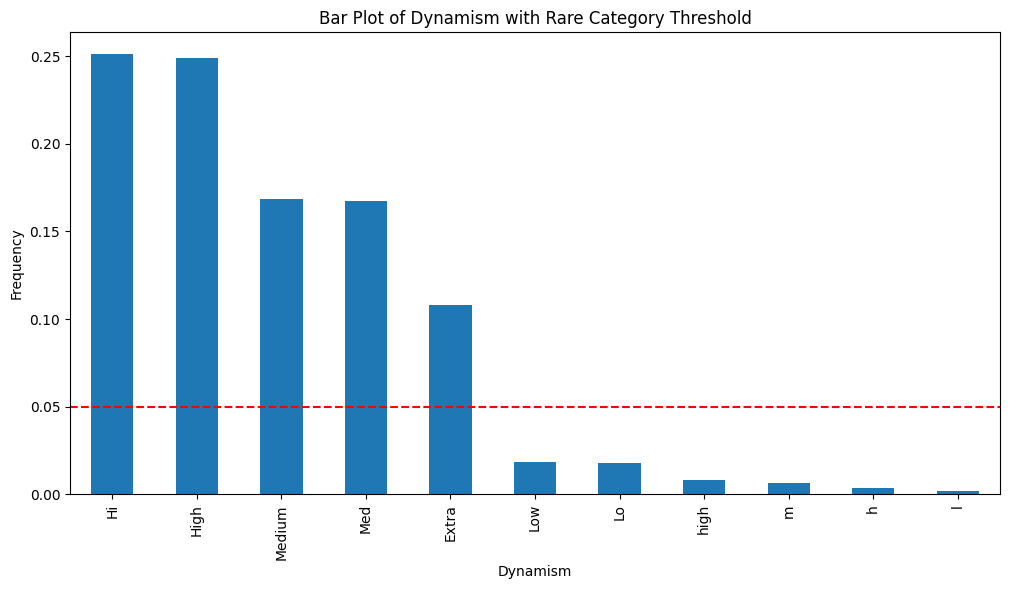

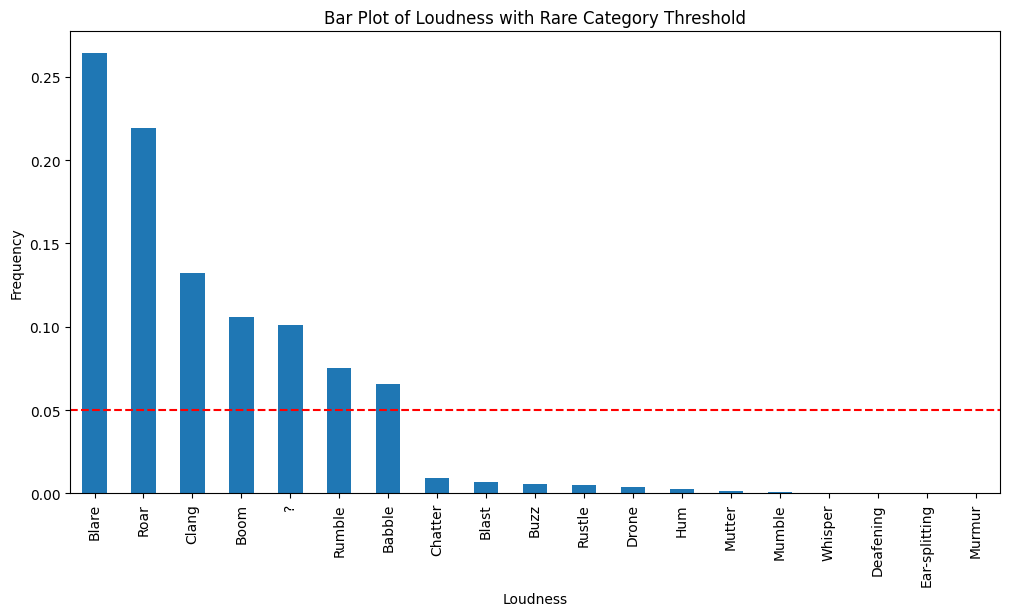

Index(['Chatter', 'Blast', 'Buzz', 'Rustle', 'Drone', 'Hum', 'Mutter',
       'Mumble', 'Whisper', 'Deafening', 'Ear-splitting', 'Murmur'],
      dtype='object', name='Loudness')

In [1763]:
plot_rare_categories(data, 'Dynamism')
plot_rare_categories(data, 'Loudness')

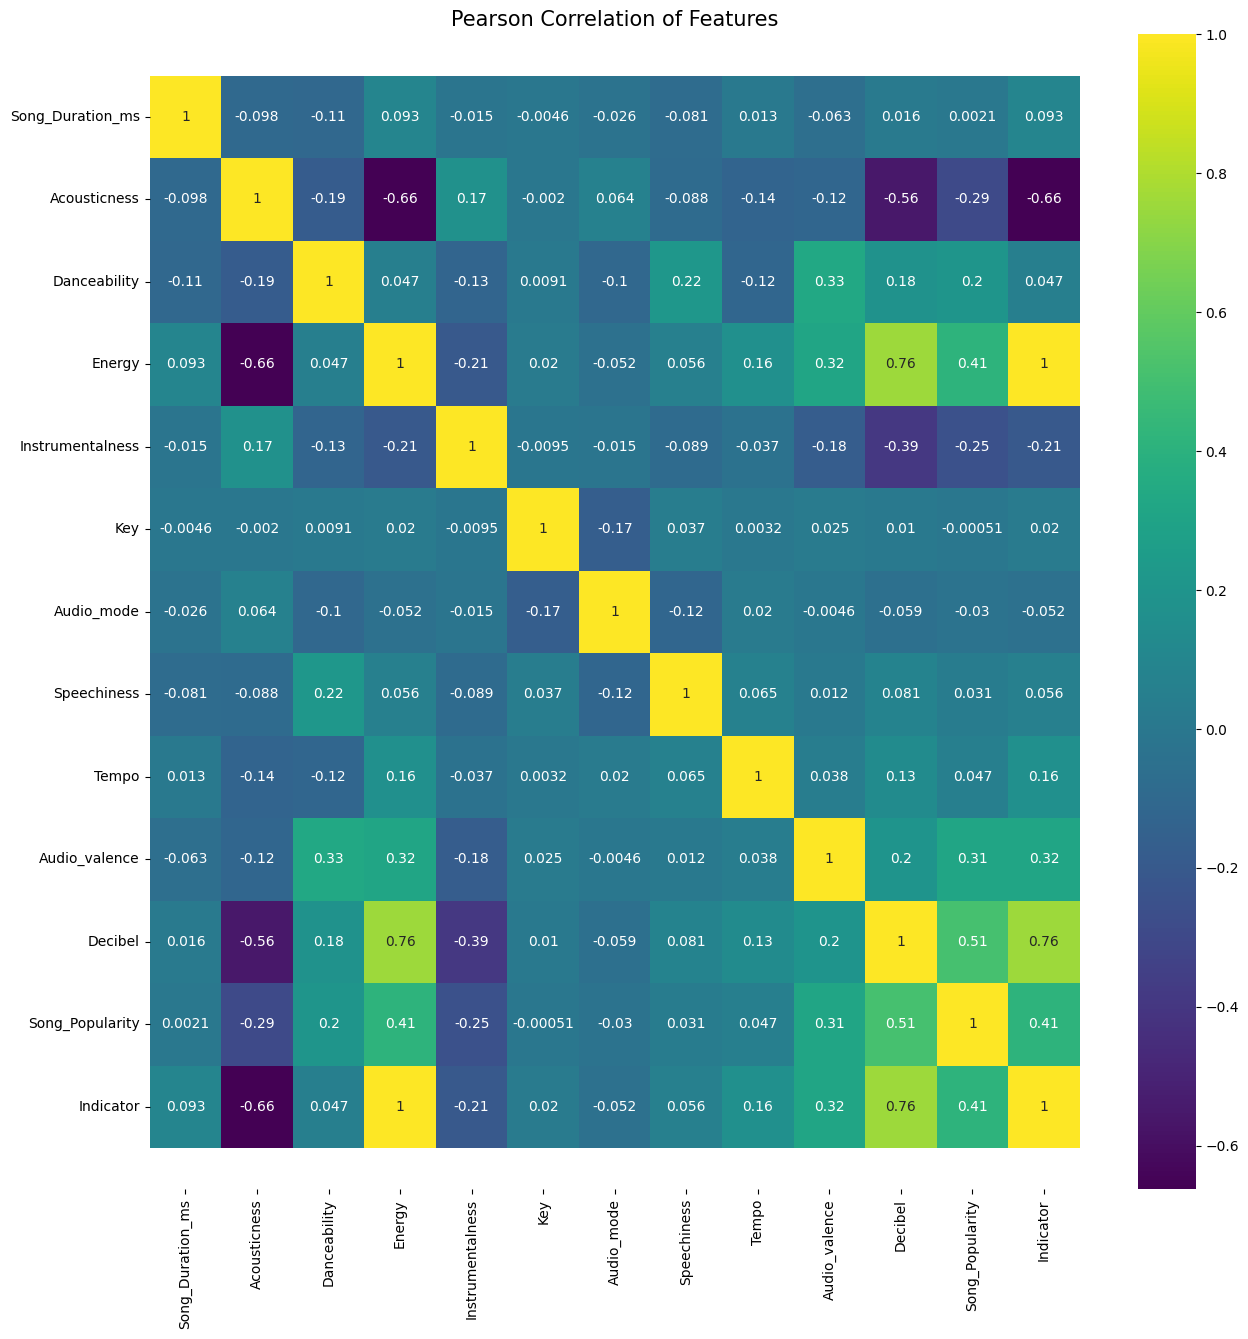

In [1764]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(data[num_cols].corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Step 3: Data Preprocessing

In [1765]:
data = data.drop('Code',axis=1)
data = data.drop('Song_Name',axis=1)
data = data.drop('Indicator',axis=1)
data = data.drop('Key',axis=1)
data = data.drop('Audio_mode',axis=1)

In [1766]:
data.replace('?',np.nan)

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity
0,262333,0.005410,0.49104,68.2,0.000029,112.126921,44.10,167.060,0.474,High,-4.095,Blare,57.72
1,216933,0.010094,0.53658,85.3,0.000000,122.7664,NaN,105.256,0.370,high,-6.407,Roar,45.37
2,231733,0.008007,0.72963,46.3,0.447000,157.5025,118.80,123.881,0.324,Med,-7.828,Roar,47.28
3,216933,0.025872,0.44649,97.0,0.003550,121.4404,160.50,122.444,0.198,Extra,-4.938,Blare,52.89
4,223826,0.000935,0.44253,76.6,0.000000,123.8769,46.95,172.011,0.574,Hi,-5.065,Blare,46.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.875140,0.49500,15.1,0.000065,123.4321,52.20,113.969,0.300,Lo,-16.107,Chatter,31.80
18831,205666,0.749700,0.49005,16.1,0.000001,122.1025,45.15,94.286,0.265,Low,-14.078,Babble,32.91
18832,182211,0.830060,0.71181,32.5,0.000000,126.5625,53.25,130.534,0.286,NaN,-12.222,Babble,15.18
18833,352280,0.926100,0.48312,32.6,0.015700,125.2161,49.20,106.063,0.323,Medium,-12.020,Babble,33.01


In [1767]:
print(len(data[data['Liveness'] == '?']))

1


In [1768]:
data = data[data['Liveness'] != '?']

In [1769]:
print(len(data[data['Liveness'] == '?']))

0


In [1770]:
data['Liveness'] = pd.to_numeric(data['Liveness'], errors='coerce')

In [1771]:
data = data.drop_duplicates()
print(data)

       Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0                262333      0.005410       0.49104    68.2          0.000029   
1                216933      0.010094       0.53658    85.3          0.000000   
2                231733      0.008007       0.72963    46.3          0.447000   
3                216933      0.025872       0.44649    97.0          0.003550   
4                223826      0.000935       0.44253    76.6          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.875140       0.49500    15.1          0.000065   
18831            205666      0.749700       0.49005    16.1          0.000001   
18832            182211      0.830060       0.71181    32.5          0.000000   
18833            352280      0.926100       0.48312    32.6          0.015700   
18834            193533      0.892780       0.63360    38.1          0.000254   

         Liveness  Speechin

In [1772]:
dynamism_map = {"high": "High", "Hi": "High", "h": "High", 
                "Medium": "Med", "m": "Med", 
                "Lo": "Low", "l": "Low", "Extra": "Extra High"} 
 
data["Dynamism"] = data["Dynamism"].replace(dynamism_map)
print(data["Dynamism"].unique())

['High' 'Med' 'Extra High' nan 'Low']


In [1773]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

### Step 4: Train and Test Split

In [1774]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Song_Popularity', axis=1), data['Song_Popularity'], test_size=0.3, random_state=69)

X_train.shape, X_test.shape

((12553, 12), (5380, 12))

### Step 5: Missing Value Imputation

In [1775]:
X_train.isnull().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        1993
Energy                 0
Instrumentalness       0
Liveness               0
Speechiness         3805
Tempo                  0
Audio_valence          0
Dynamism            2519
Decibel                0
Loudness               0
dtype: int64

In [1776]:
mode_imputer = mdi.CategoricalImputer(variables=['Dynamism'], imputation_method = 'frequent')
mode_imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent', variables=['Dynamism'])

In [1777]:
mode_imputer.imputer_dict_

{'Dynamism': 'High'}

In [1778]:
X_train = mode_imputer.transform(X_train)
X_test = mode_imputer.transform(X_test)

In [1779]:
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['Speechiness', 'Danceability'])
median_imputer.fit(X_train)

MeanMedianImputer(variables=['Speechiness', 'Danceability'])

In [1780]:
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [1781]:
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Liveness            0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
dtype: int64

In [1782]:
freq = X_train['Loudness'].value_counts(normalize=True)
rare_categories = freq[freq < 0.05].index
X_train['Loudness_is_rare'] = X_train['Loudness'].isin(rare_categories).astype(int)
X_test['Loudness_is_rare'] = X_test['Loudness'].isin(rare_categories).astype(int)

In [1783]:
freq = X_train['Dynamism'].value_counts(normalize=True)
rare_categories = freq[freq < 0.05].index
X_train['Dynamism_is_rare'] = X_train['Dynamism'].isin(rare_categories).astype(int)
X_test['Dynamism_is_rare'] = X_test['Dynamism'].isin(rare_categories).astype(int)

In [1784]:
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Loudness_is_rare,Dynamism_is_rare
467,192145,0.918260,0.61083,4.57,0.64100,120.802081,51.6,99.480,0.0967,Low,-26.401,Hum,1,1
9928,161346,0.016954,0.83259,81.40,0.02720,182.250000,81.9,119.006,0.7760,High,-4.909,Blare,0,0
14147,196223,0.000453,0.50193,92.40,0.00000,180.902500,83.4,100.013,0.8030,Extra High,-4.063,Blare,0,0
7919,210857,0.007036,0.90684,83.00,0.00714,183.602500,402.0,139.905,0.4540,High,-4.867,Blare,0,0
18041,246632,0.068894,0.48114,81.50,0.72600,138.297600,81.9,104.592,0.6110,High,-4.923,Blare,0,0


In [1785]:
X_test.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Loudness_is_rare,Dynamism_is_rare
8993,180079,0.004087,0.55935,99.0,0.000001,115.734564,451.50,149.872,0.501,Extra High,-3.096,Boom,0,0
16265,243413,0.271460,0.71874,86.1,0.000004,110.965156,104.25,91.966,0.711,High,-5.167,Blare,0,0
10307,212933,0.216580,0.78210,55.1,0.000000,114.105124,81.90,179.277,0.787,Med,-7.674,?,0,0
14490,142640,0.029792,0.89694,67.2,0.000926,122.102500,75.75,123.020,0.734,High,-5.828,Blare,0,0
3340,257463,0.623280,0.83655,77.4,0.000998,119.968209,69.75,138.067,0.867,High,-3.688,Boom,0,0


In [1786]:
def diagnostic_plots(df, variable):
    if pd.api.types.is_numeric_dtype(df[variable]):
        plt.figure(figsize=(15, 6))
        
        # Histogram
        plt.subplot(1, 3, 1)
        df[variable].hist(bins=30)
        plt.title(f'Histogram of {variable}')
        
        # Q-Q Plot
        plt.subplot(1, 3, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {variable}')
        
        # Boxplot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[variable])
        plt.title(f'Boxplot of {variable}')

        plt.show()

In [1787]:
exclude_columns = ['Loudness_is_rare', 'Dynamism_is_rare']

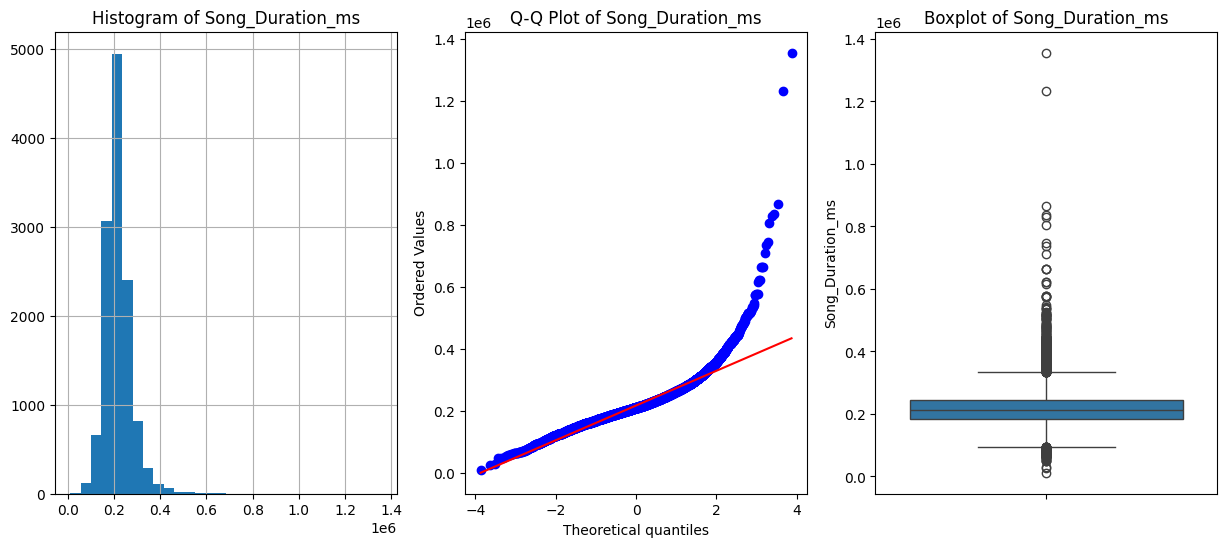

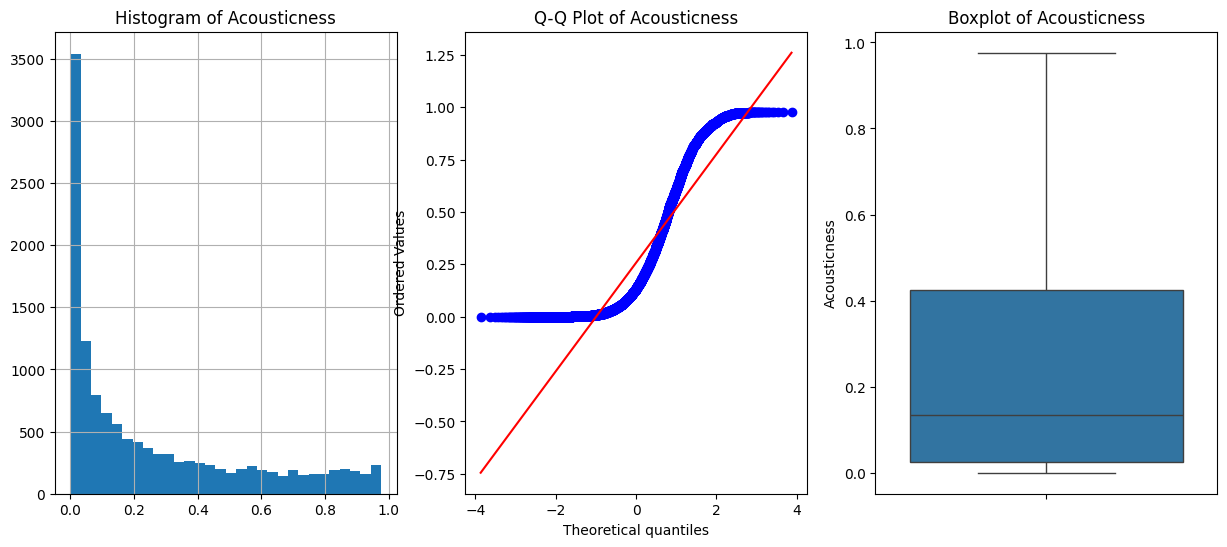

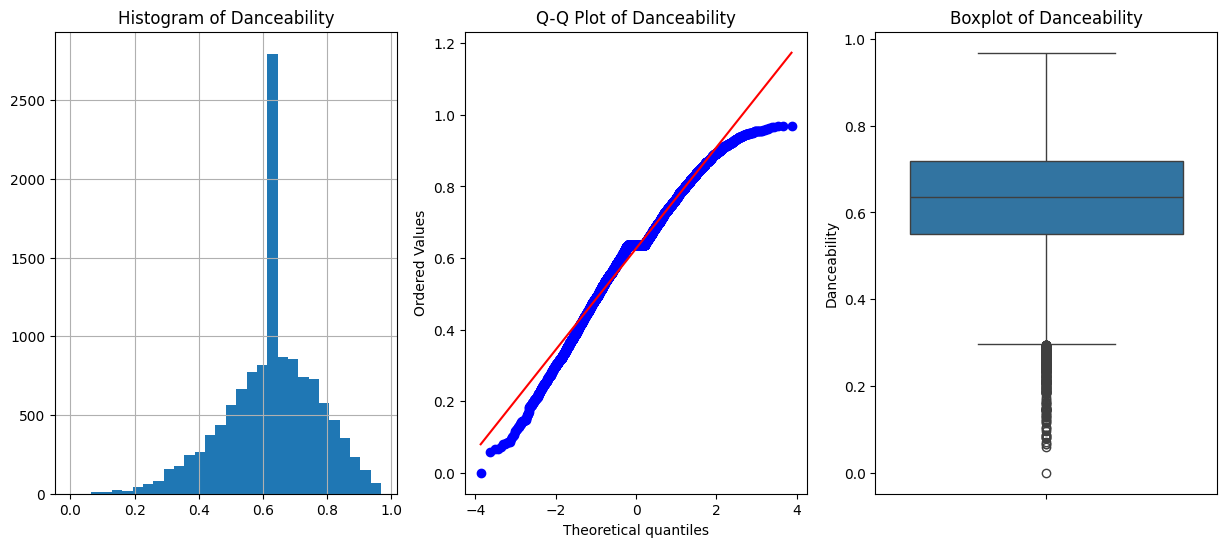

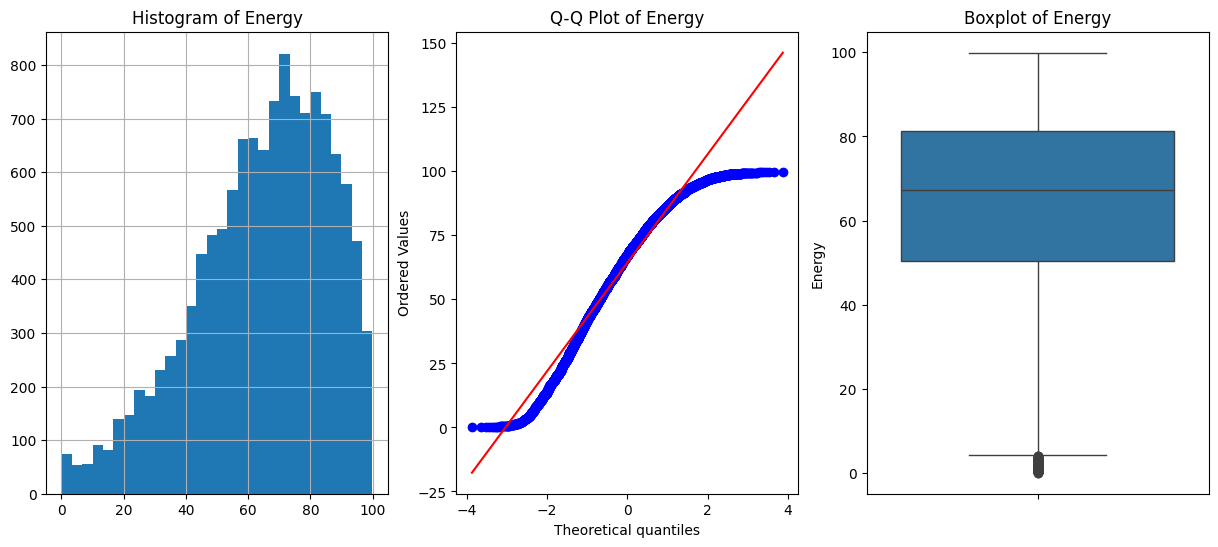

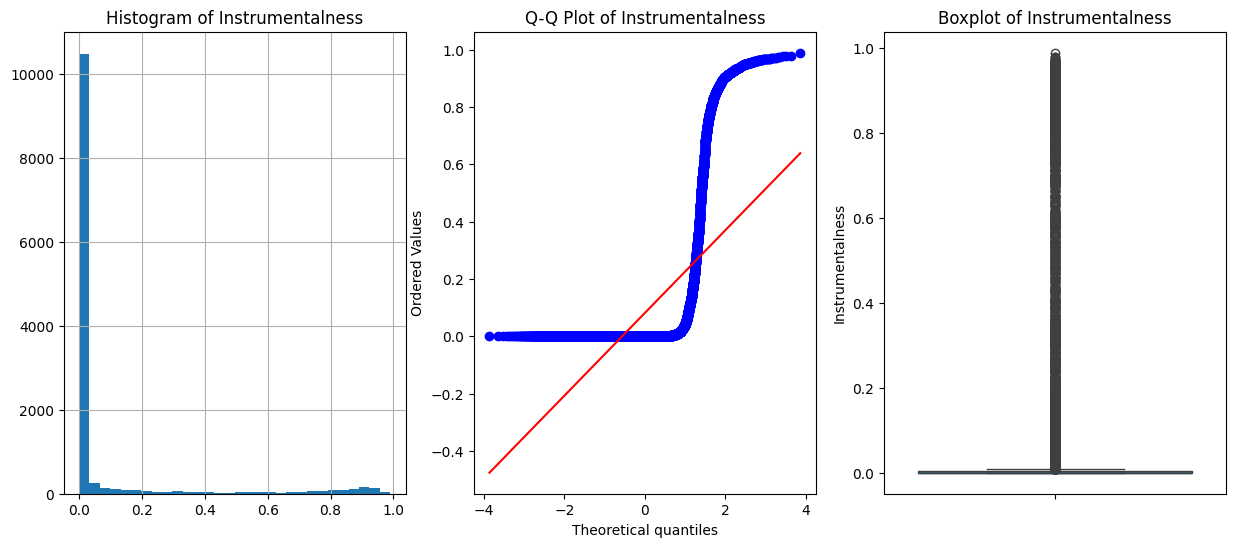

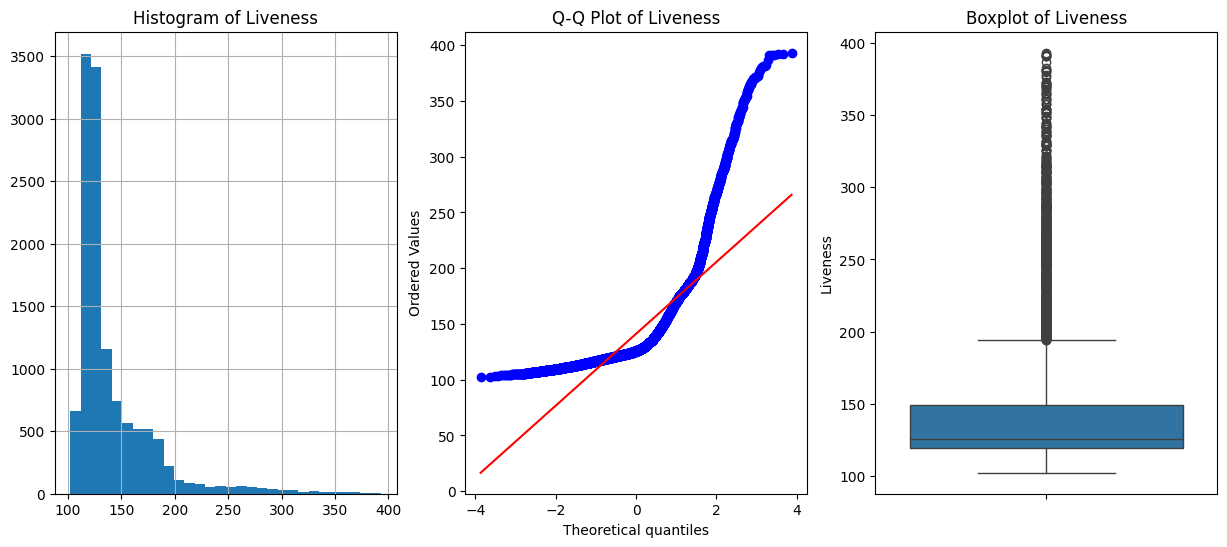

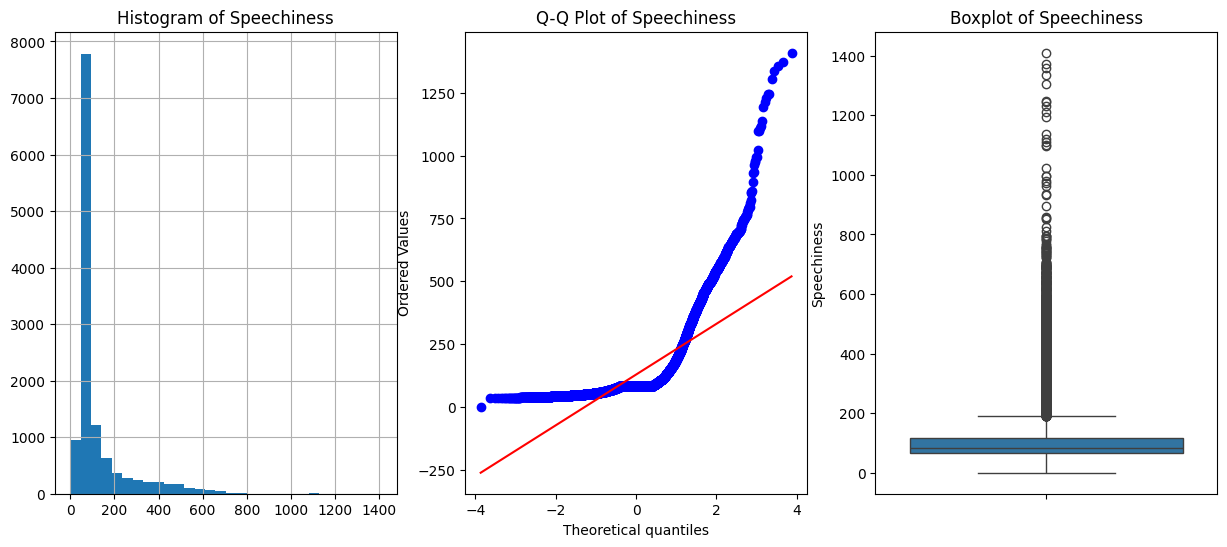

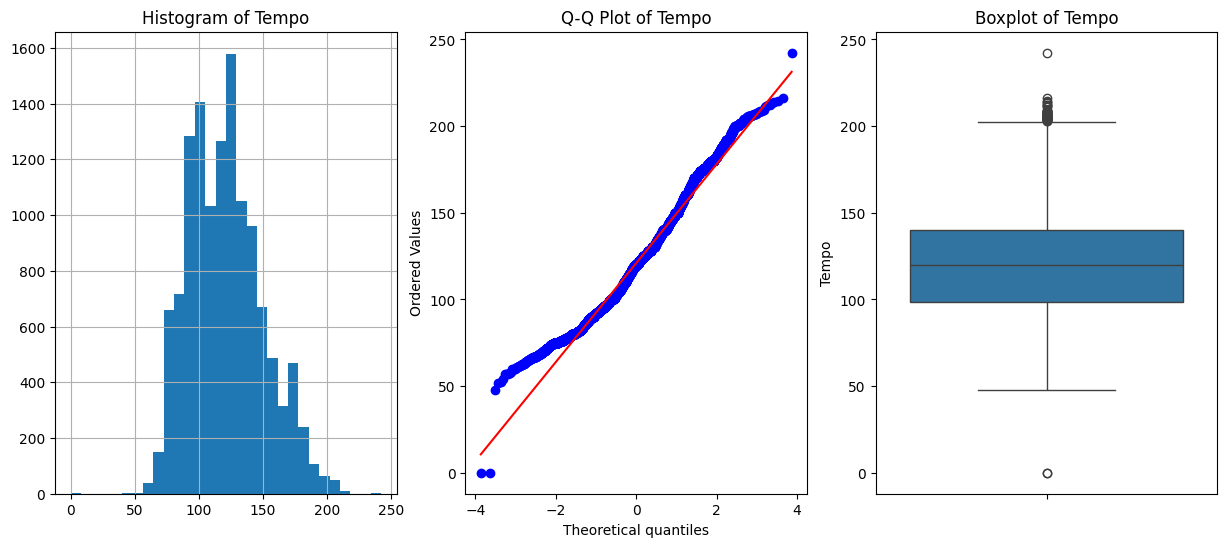

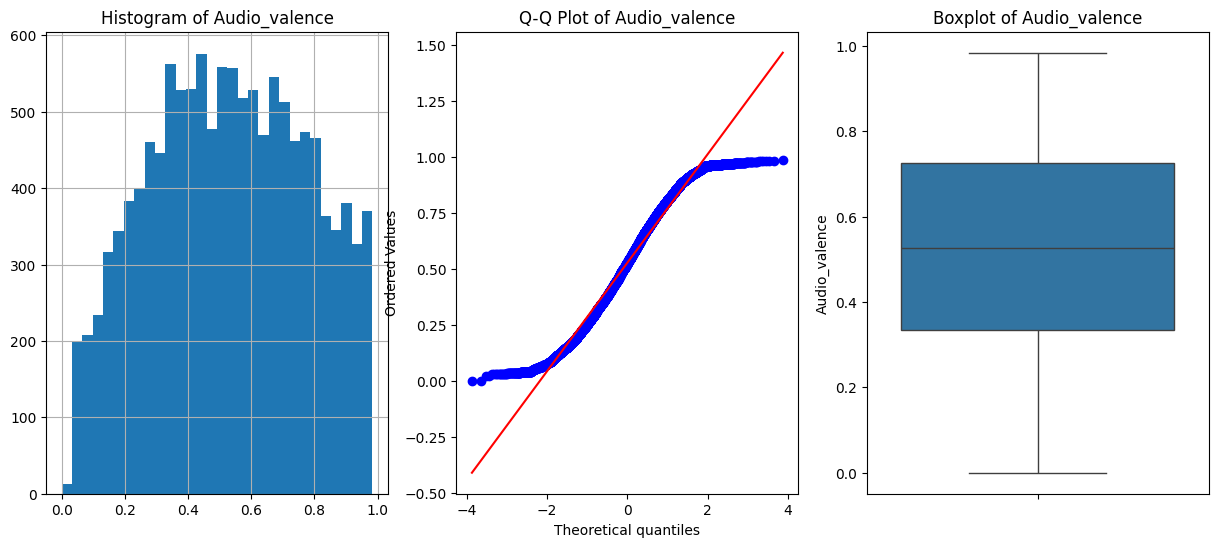

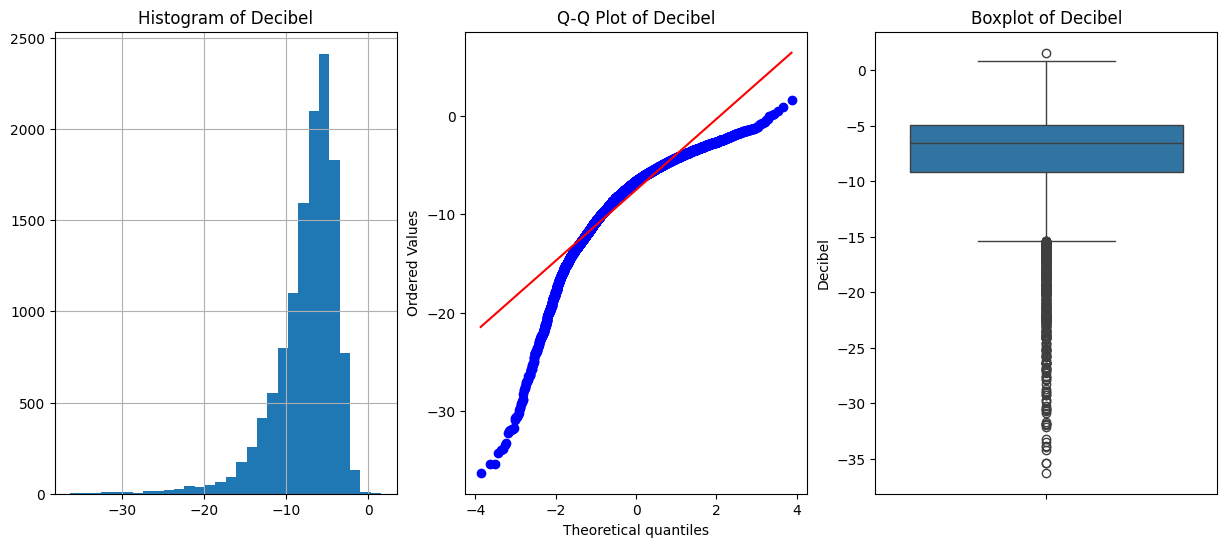

In [1788]:
for variable in X_train.columns:
    if variable not in exclude_columns:
        diagnostic_plots(X_train, variable)

In [1789]:
num_cols = num_cols = [c for c in X_train.columns if X_train[c].dtypes !='O']

In [1790]:
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both',
                        fold =0.01,
                        variables=num_cols)
windsorizer.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
           variables=['Song_Duration_ms', 'Acousticness', 'Danceability',
                      'Energy', 'Instrumentalness', 'Liveness', 'Speechiness',
                      'Tempo', 'Audio_valence', 'Decibel', 'Loudness_is_rare',
                      'Dynamism_is_rare'])

In [1791]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

In [1792]:
yjt = YeoJohnsonTransformer(variables=num_cols)

In [1793]:
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['Song_Duration_ms', 'Acousticness',
                                 'Danceability', 'Energy', 'Instrumentalness',
                                 'Liveness', 'Speechiness', 'Tempo',
                                 'Audio_valence', 'Decibel', 'Loudness_is_rare',
                                 'Dynamism_is_rare'])

In [1794]:
X_train_transformed = yjt.transform(X_train)
X_test_transformed = yjt.transform(X_test)

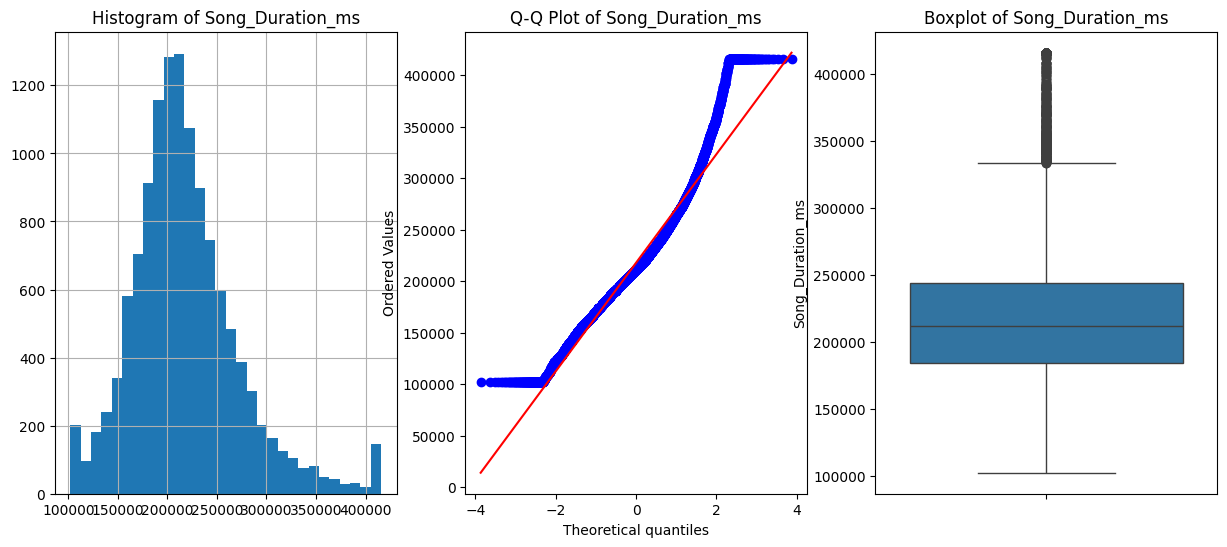

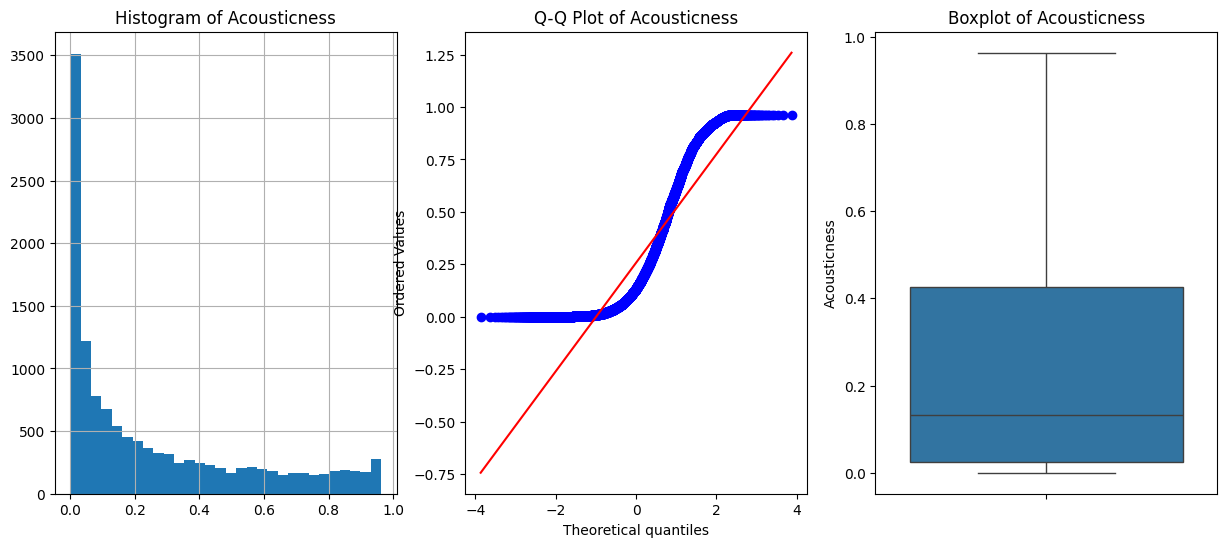

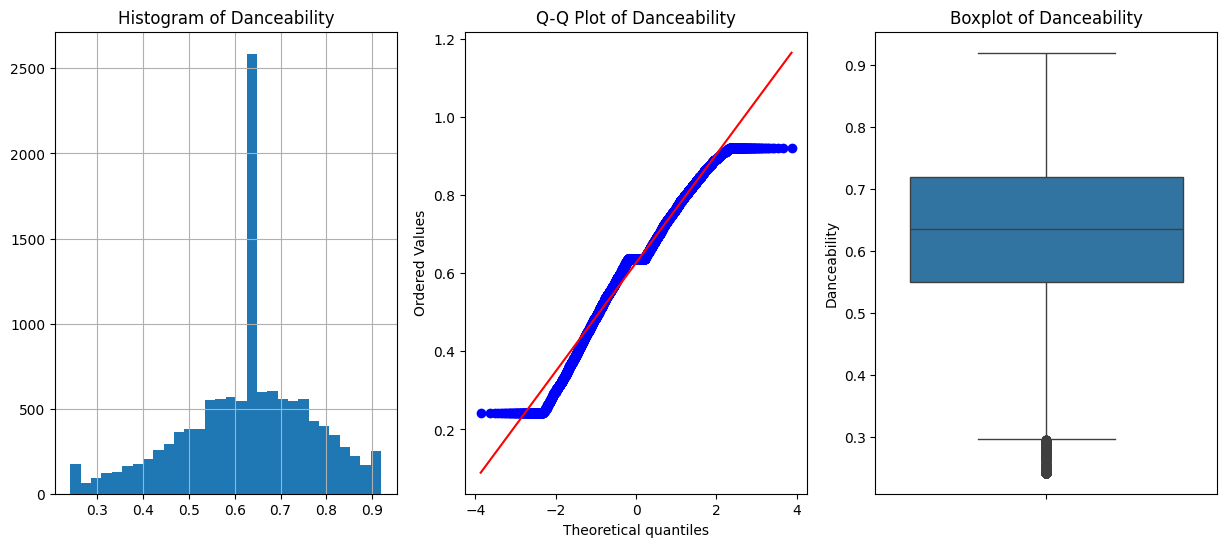

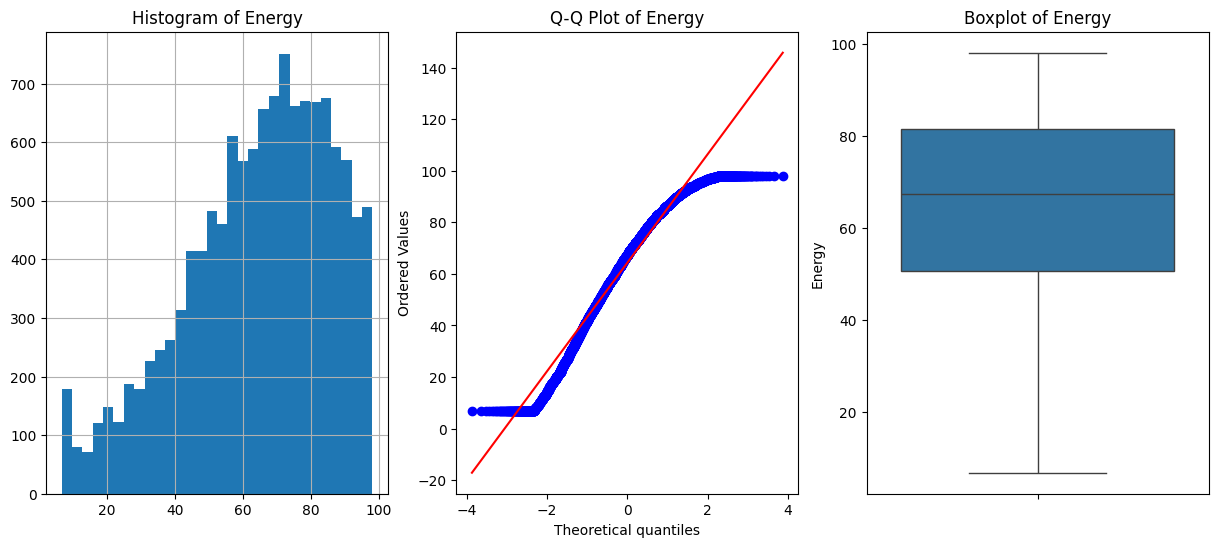

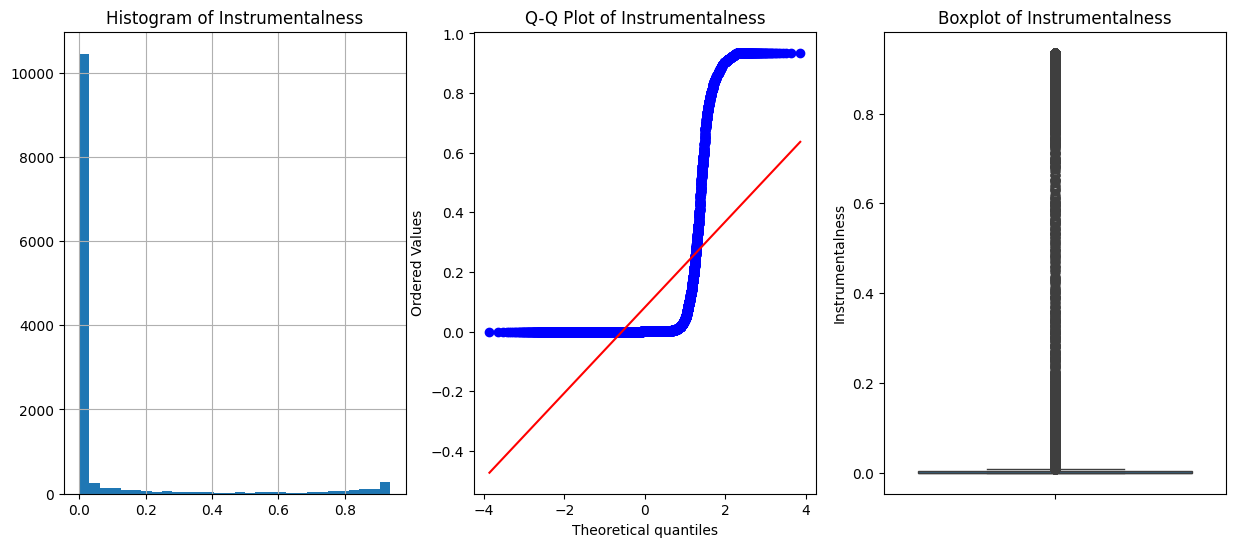

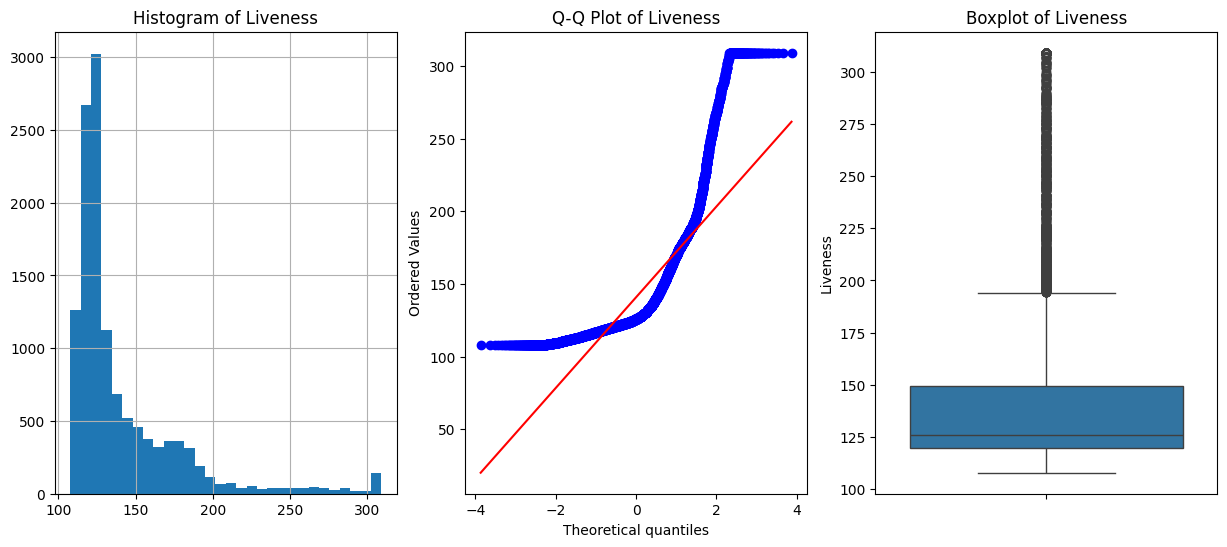

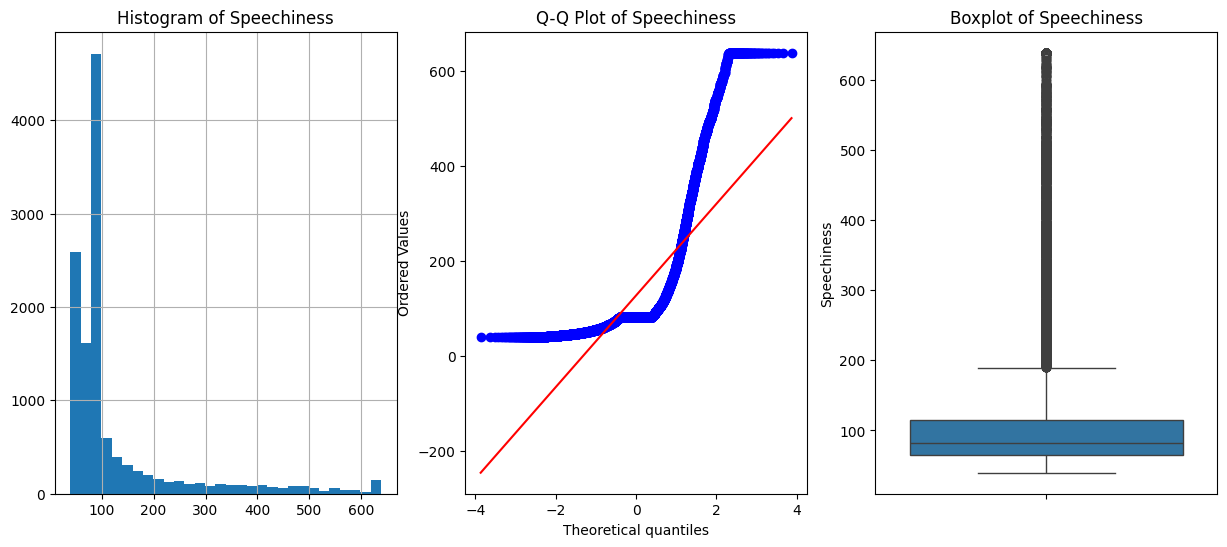

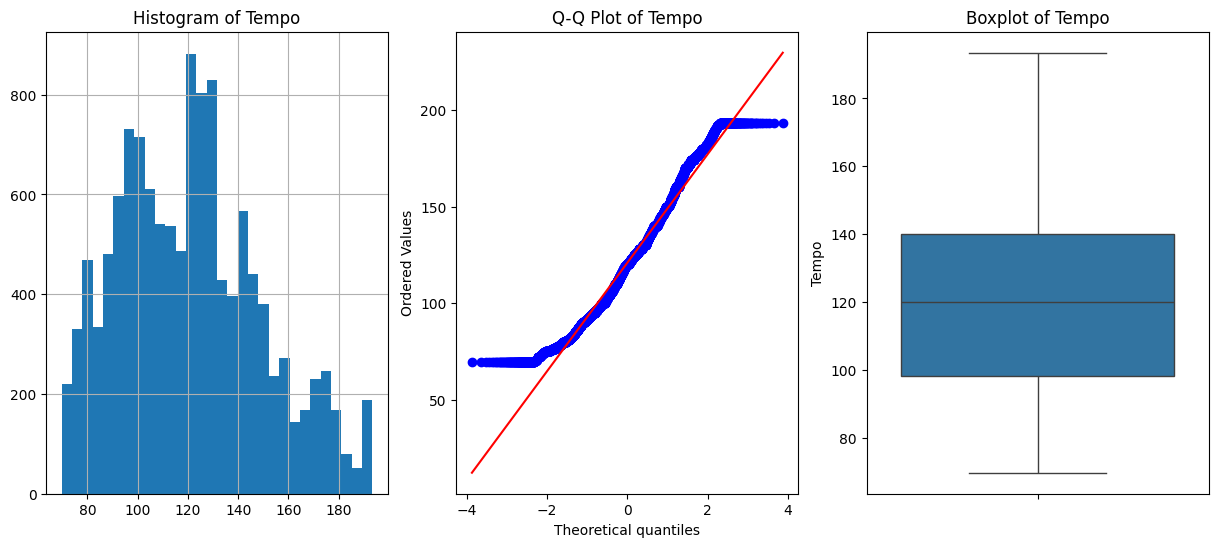

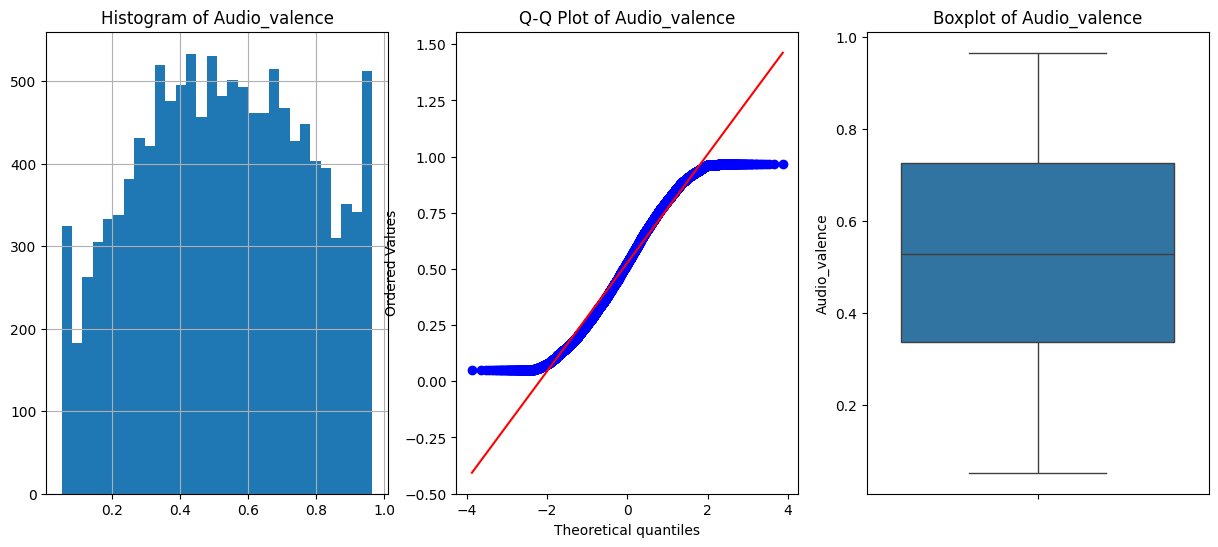

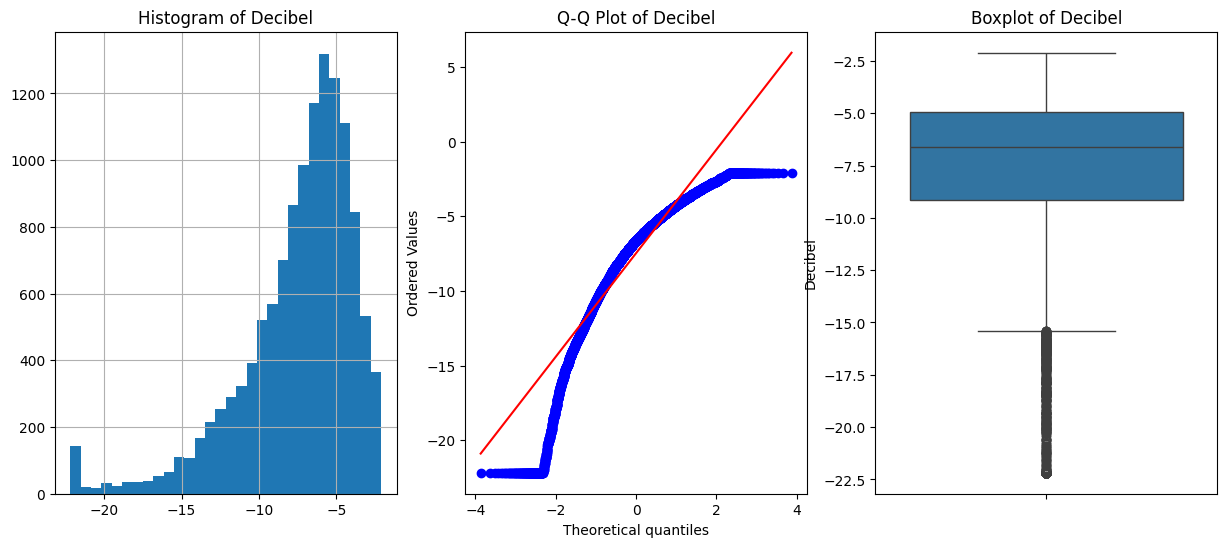

In [1795]:
for variable in X_train_transformed.columns:
    if variable not in exclude_columns:
        diagnostic_plots(X_train, variable)

### Step 6: Categorical Data Encoding

In [1796]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)

In [1797]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [1798]:
ohe_enc.variables

In [1799]:
ohe_enc.encoder_dict_

{'Dynamism': ['Low', 'High', 'Extra High'],
 'Loudness': ['Hum',
  'Blare',
  'Roar',
  'Clang',
  '?',
  'Boom',
  'Rumble',
  'Whisper',
  'Babble',
  'Blast',
  'Buzz',
  'Chatter',
  'Rustle',
  'Mutter',
  'Drone',
  'Mumble',
  'Deafening']}

In [1800]:
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [1801]:
print(X_train_enc.head(5))

       Song_Duration_ms  Acousticness  Danceability   Energy  \
467            192145.0      0.918260       0.61083   6.7104   
9928           161346.0      0.016954       0.83259  81.4000   
14147          196223.0      0.000453       0.50193  92.4000   
7919           210857.0      0.007036       0.90684  83.0000   
18041          246632.0      0.068894       0.48114  81.5000   

       Instrumentalness    Liveness  Speechiness    Tempo  Audio_valence  \
467             0.64100  120.802081         51.6   99.480         0.0967   
9928            0.02720  182.250000         81.9  119.006         0.7760   
14147           0.00000  180.902500         83.4  100.013         0.8030   
7919            0.00714  183.602500        402.0  139.905         0.4540   
18041           0.72600  138.297600         81.9  104.592         0.6110   

        Decibel  ...  Loudness_Whisper  Loudness_Babble  Loudness_Blast  \
467   -22.17988  ...                 0                0               0   
9928   -

### Step 7: Variable Discretization /Binning

In [1802]:
scaler = MinMaxScaler()

scaler.fit(X_train_enc)

MinMaxScaler()

In [1803]:
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [1804]:
print(X_train_scaled)

[[2.86928759e-01 9.53202843e-01 5.44498949e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.88759972e-01 1.75649079e-02 8.71525345e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.99926983e-01 4.35113901e-04 3.83905630e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.55522983e-01 5.44236387e-01 3.44487269e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.01893610e-01 1.98344359e-01 7.29911236e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.77640670e-01 8.26785756e-04 8.39406681e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [1805]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)
print(X_train_scaled.head(5))

   Song_Duration_ms  Acousticness  Danceability    Energy  Instrumentalness  \
0          0.286929      0.953203      0.544499  0.000000          0.685210   
1          0.188760      0.017565      0.871525  0.817266          0.029076   
2          0.299927      0.000435      0.383906  0.937630          0.000000   
3          0.346571      0.007270      0.981021  0.834773          0.007632   
4          0.460601      0.071483      0.353247  0.818360          0.776072   

   Liveness  Speechiness     Tempo  Audio_valence   Decibel  ...  \
0  0.064616     0.019800  0.240522       0.049155  0.000000  ...   
1  0.369683     0.070430  0.398274       0.793033  0.860541  ...   
2  0.362993     0.072936  0.244828       0.822600  0.902694  ...   
3  0.376398     0.605293  0.567119       0.440422  0.862633  ...   
4  0.151475     0.070430  0.281823       0.612347  0.859843  ...   

   Loudness_Whisper  Loudness_Babble  Loudness_Blast  Loudness_Buzz  \
0               0.0              0.0         

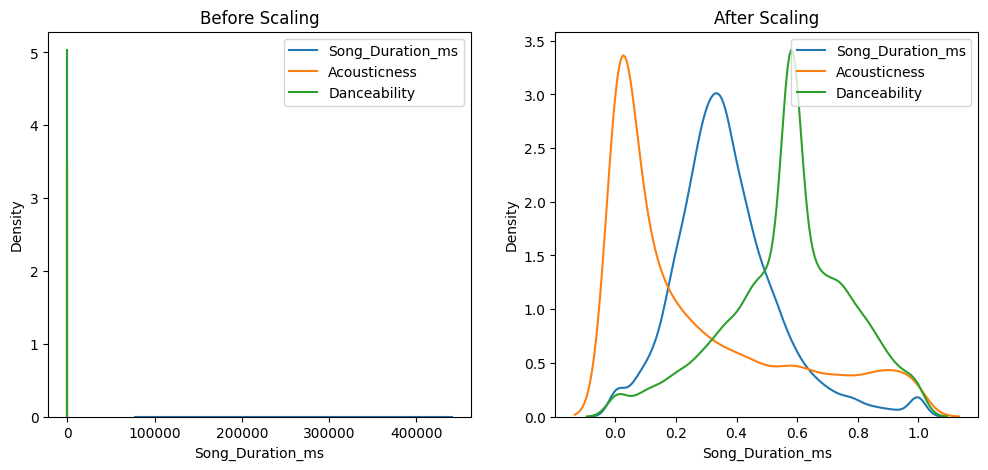

In [1806]:
#columns = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Instrumentalness',
                # 'Speechiness', 'Tempo', 'Audio_valence', 'Decibel', 'Liveness']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Acousticness'], ax=ax1, label ='Acousticness')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Song_Duration_ms'], ax=ax2, label ='Song_Duration_ms')
sns.kdeplot(X_train_scaled['Acousticness'], ax=ax2, label ='Acousticness')
sns.kdeplot(X_train_scaled['Danceability'], ax=ax2, label ='Danceability')
ax2.legend()
plt.show()

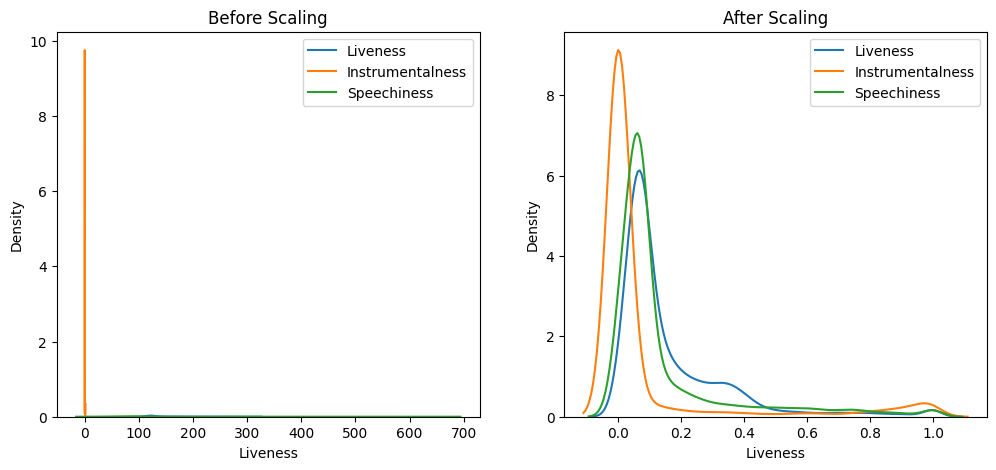

In [1807]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Liveness'], ax=ax1, label ='Liveness')
sns.kdeplot(X_train['Instrumentalness'], ax=ax1, label ='Instrumentalness')
sns.kdeplot(X_train['Speechiness'], ax=ax1, label ='Speechiness')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train_scaled['Instrumentalness'], ax=ax2, label ='Instrumentalness')
sns.kdeplot(X_train_scaled['Speechiness'], ax=ax2, label ='Speechiness')
ax2.legend()
plt.show()

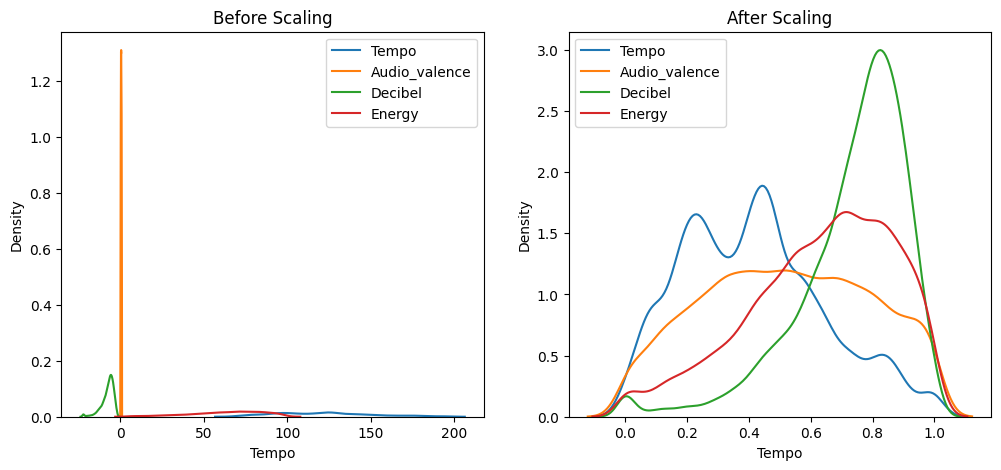

In [1808]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Tempo'], ax=ax1, label ='Tempo')
sns.kdeplot(X_train['Audio_valence'], ax=ax1, label ='Audio_valence')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
sns.kdeplot(X_train['Energy'], ax=ax1, label ='Energy')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train_scaled['Audio_valence'], ax=ax2, label ='Audio_valence')
sns.kdeplot(X_train_scaled['Decibel'], ax=ax2, label ='Decibel')
sns.kdeplot(X_train_scaled['Energy'], ax=ax2, label ='Energy')
ax2.legend()
plt.show()

In [1809]:
scaler_ = RobustScaler()

scaler_.fit(X_train_enc)

RobustScaler()

In [1810]:
X_train_scaled_ = scaler_.transform(X_train_enc)
X_test_scaled_ = scaler_.transform(X_train_enc)

In [1811]:
X_train_scaled_ = pd.DataFrame(X_train_scaled_, columns=X_train_enc.columns)
X_test_scaled_ = pd.DataFrame(X_test_scaled_, columns=X_test_enc.columns)

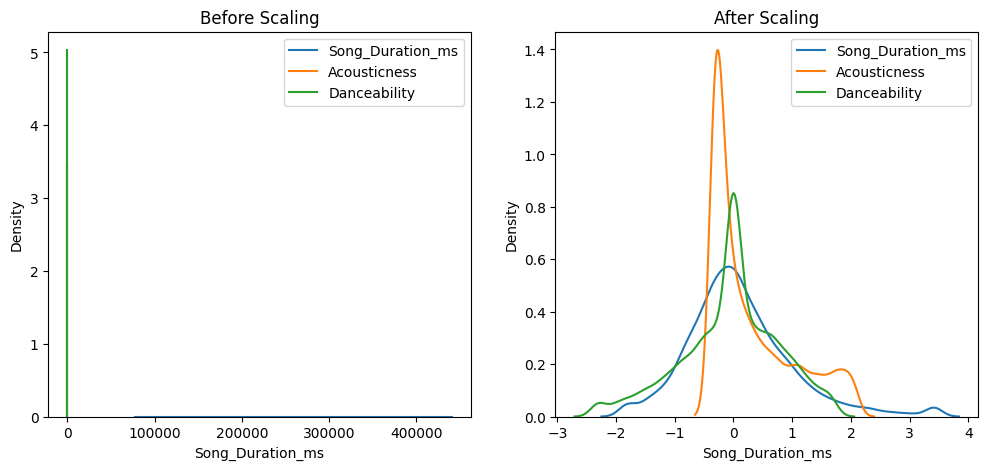

In [1812]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Acousticness'], ax=ax1, label ='Acousticness')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_['Song_Duration_ms'], ax=ax2, label ='Song_Duration_ms')
sns.kdeplot(X_train_scaled_['Acousticness'], ax=ax2, label ='Acousticness')
sns.kdeplot(X_train_scaled_['Danceability'], ax=ax2, label ='Danceability')
ax2.legend()
plt.show()

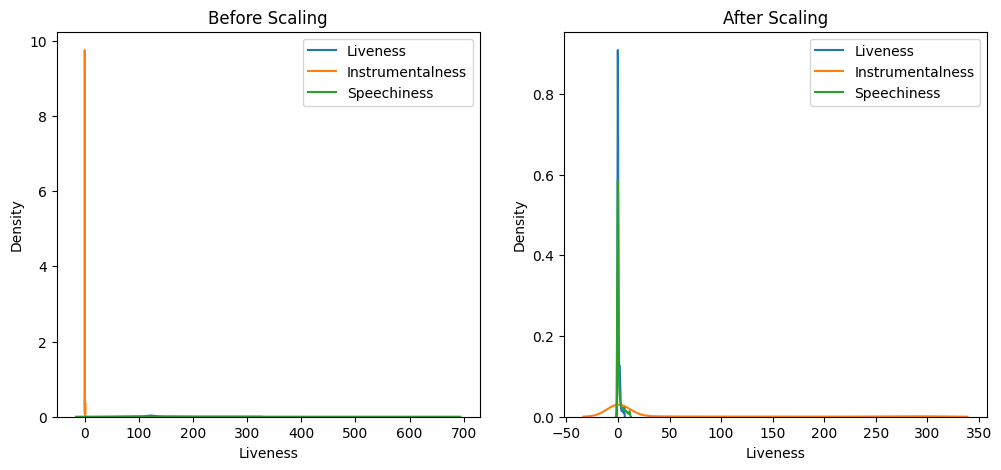

In [1813]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Liveness'], ax=ax1, label ='Liveness')
sns.kdeplot(X_train['Instrumentalness'], ax=ax1, label ='Instrumentalness')
sns.kdeplot(X_train['Speechiness'], ax=ax1, label ='Speechiness')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train_scaled_['Instrumentalness'], ax=ax2, label ='Instrumentalness')
sns.kdeplot(X_train_scaled_['Speechiness'], ax=ax2, label ='Speechiness')
ax2.legend()
plt.show()

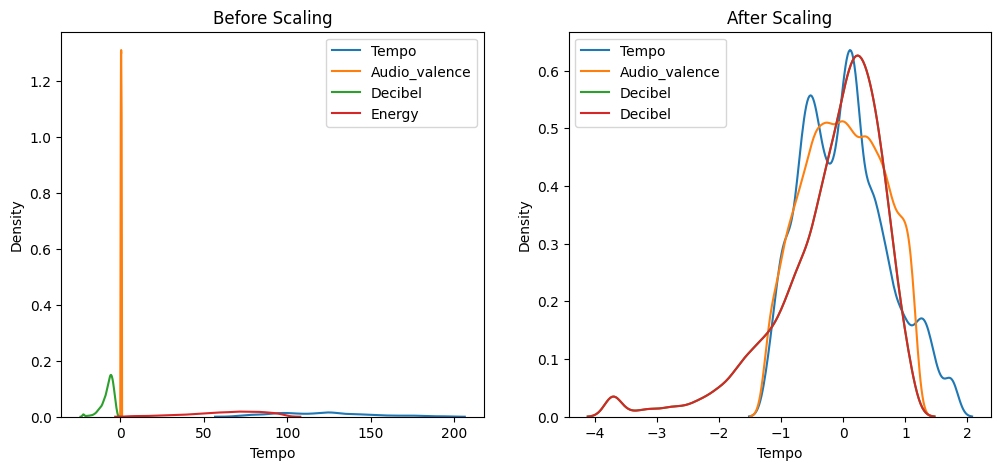

In [1814]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Tempo'], ax=ax1, label ='Tempo')
sns.kdeplot(X_train['Audio_valence'], ax=ax1, label ='Audio_valence')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
sns.kdeplot(X_train['Energy'], ax=ax1, label ='Energy')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train_scaled_['Audio_valence'], ax=ax2, label ='Audio_valence')
sns.kdeplot(X_train_scaled_['Decibel'], ax=ax2, label ='Decibel')
sns.kdeplot(X_train_scaled_['Decibel'], ax=ax2, label ='Decibel')
ax2.legend()
plt.show()

In [1815]:
columns = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Instrumentalness', 
           'Speechiness', 'Tempo', 'Audio_valence', 'Decibel', 'Liveness', 'Energy']

In [1816]:
disc = EqualFrequencyDiscretiser(q=10, variables = columns)

In [1817]:
disc.fit(X_train_scaled)

EqualFrequencyDiscretiser(variables=['Song_Duration_ms', 'Acousticness',
                                     'Danceability', 'Instrumentalness',
                                     'Speechiness', 'Tempo', 'Audio_valence',
                                     'Decibel', 'Liveness', 'Energy'])

In [1818]:
disc.binner_dict_

{'Song_Duration_ms': [-inf,
  0.18054603761975557,
  0.23935105010225835,
  0.28149423864382955,
  0.31572565854588963,
  0.3488663495669407,
  0.38233024312608155,
  0.4259026626151818,
  0.4842200026289693,
  0.5797738449206653,
  inf],
 'Acousticness': [-inf,
  0.002966229681018164,
  0.01451291943472506,
  0.03923402613208872,
  0.07728214919716696,
  0.13832191882028713,
  0.22784691426753,
  0.35806508946351967,
  0.5483057047889108,
  0.7792394998630487,
  inf],
 'Danceability': [-inf,
  0.28462975940200885,
  0.410184536323289,
  0.49048119598224715,
  0.5678579771081522,
  0.5809974305068909,
  0.5955968231721561,
  0.6647979444055121,
  0.7415907498248072,
  0.8335669236159774,
  inf],
 'Instrumentalness': [-inf,
  2.073801684696627e-06,
  1.432419720357464e-05,
  0.00011651772352161462,
  0.0010689699405652718,
  0.012293154316500625,
  0.30358746312053714,
  inf],
 'Speechiness': [-inf,
  0.015840393002155527,
  0.03208180861196054,
  0.05514060855180716,
  0.07042959546844

In [1819]:
X_train_discrete = disc.transform(X_train_scaled)
X_test_discrete = disc.transform(X_test_scaled)

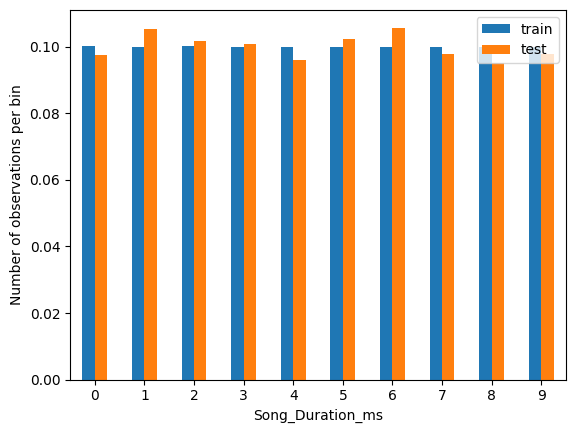

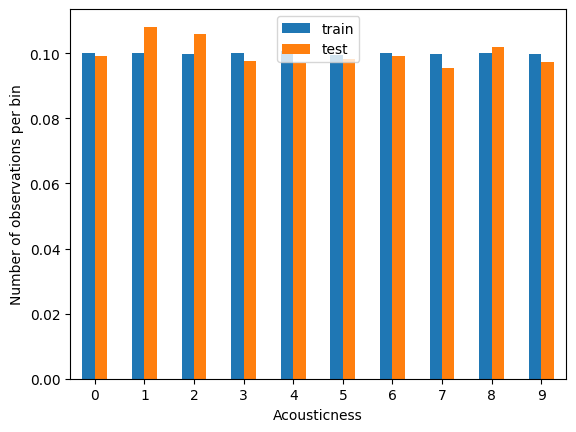

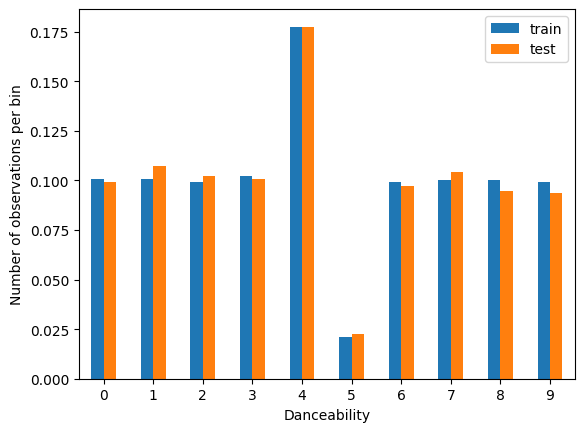

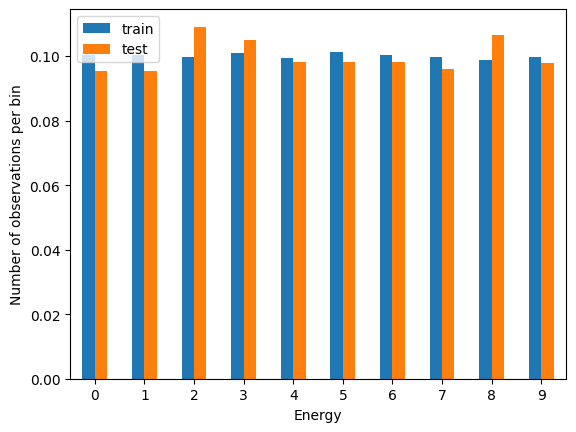

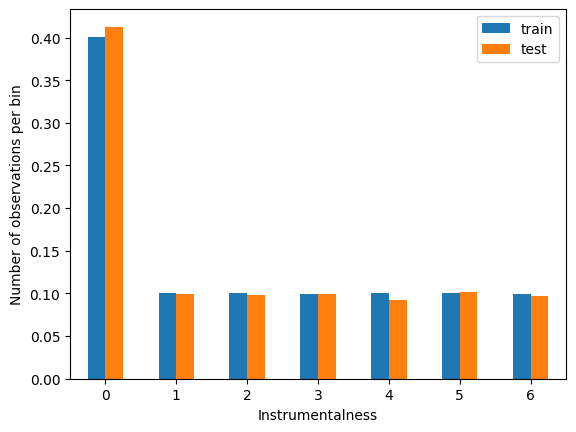

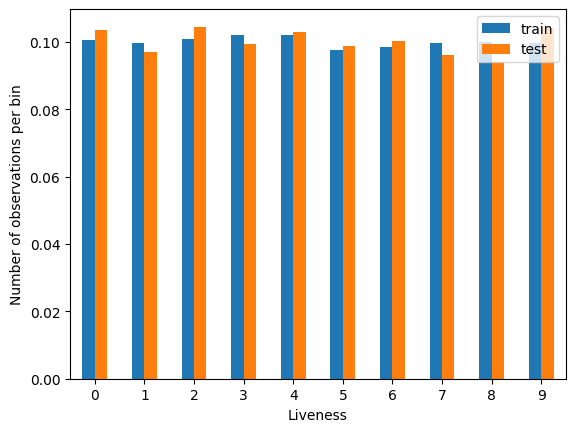

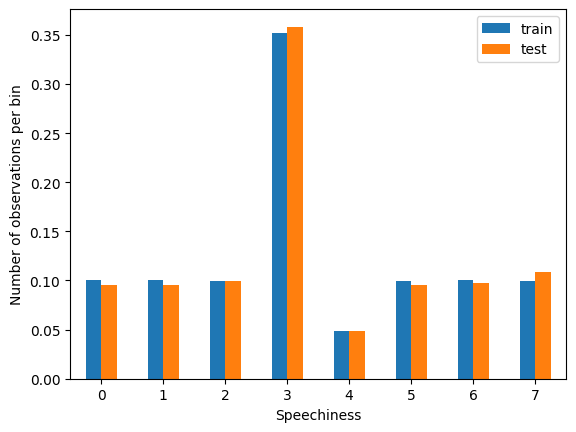

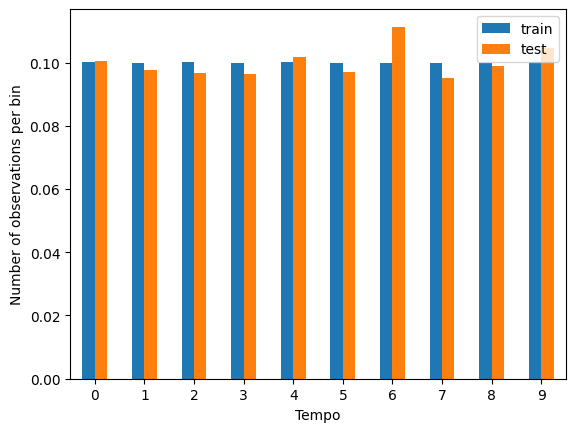

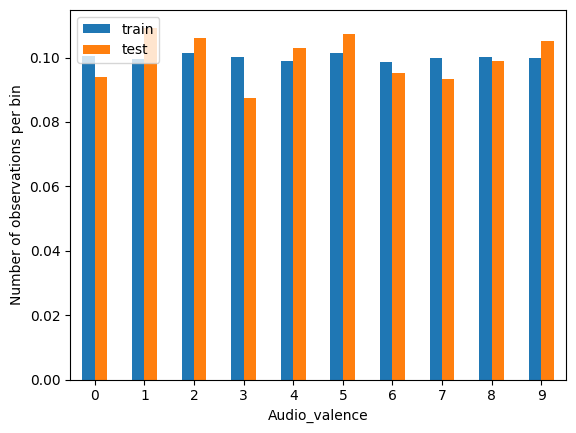

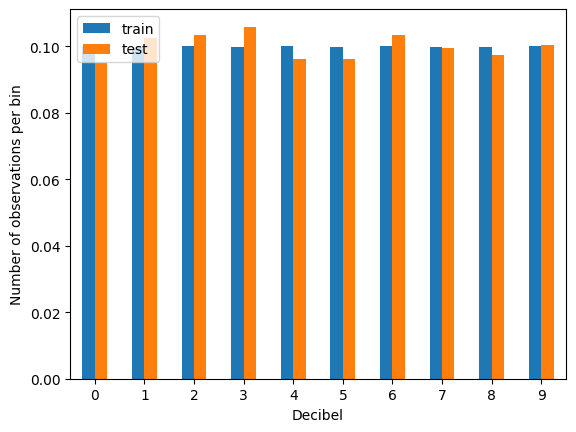

In [1820]:
for variable in X_train_discrete.columns:
    if variable in columns:
        t1 = X_train_discrete.groupby([variable])[variable].count() / len(X_train_discrete)
        t2 = X_test_discrete.groupby([variable])[variable].count() / len(X_test_discrete)

        tmp = pd.concat([t1, t2], axis=1)
        tmp.columns = ['train', 'test']
        tmp.plot.bar()
        plt.xticks(rotation=0)
        plt.ylabel('Number of observations per bin')

In [1821]:
disc_ = EqualWidthDiscretiser(bins=10, variables = columns)

disc_.fit(X_train_scaled)

EqualWidthDiscretiser(variables=['Song_Duration_ms', 'Acousticness',
                                 'Danceability', 'Instrumentalness',
                                 'Speechiness', 'Tempo', 'Audio_valence',
                                 'Decibel', 'Liveness', 'Energy'])

In [1822]:
disc_.binner_dict_

{'Song_Duration_ms': [-inf,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  inf],
 'Acousticness': [-inf,
  0.09999999999999999,
  0.19999999999999998,
  0.3,
  0.39999999999999997,
  0.49999999999999994,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  inf],
 'Danceability': [-inf,
  0.09999999999999999,
  0.19999999999999998,
  0.3,
  0.39999999999999997,
  0.49999999999999994,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  inf],
 'Instrumentalness': [-inf,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  inf],
 'Speechiness': [-inf,
  0.09999999999999999,
  0.19999999999999998,
  0.3,
  0.39999999999999997,
  0.49999999999999994,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  inf],
 'Tempo': [-inf,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  inf],
 'Audio_va

In [1823]:
X_train_discrete_ = disc_.transform(X_train_scaled)
X_test_discrete_ = disc_.transform(X_test_scaled)

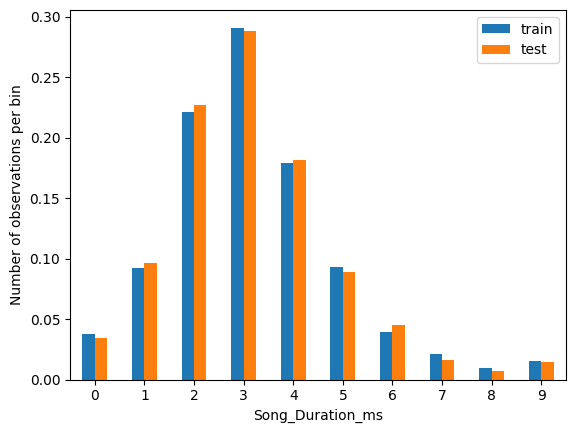

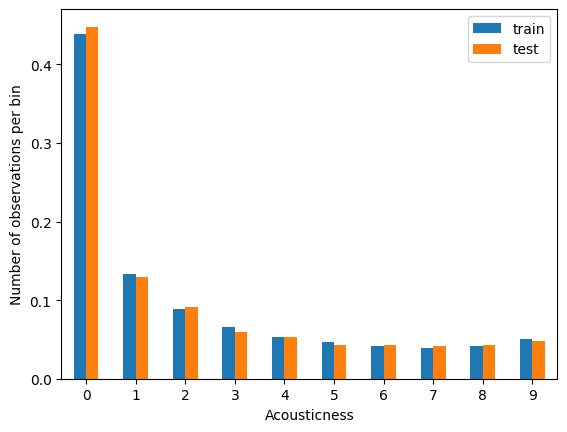

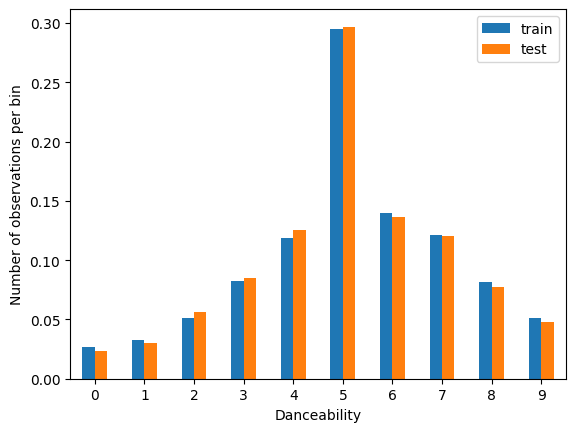

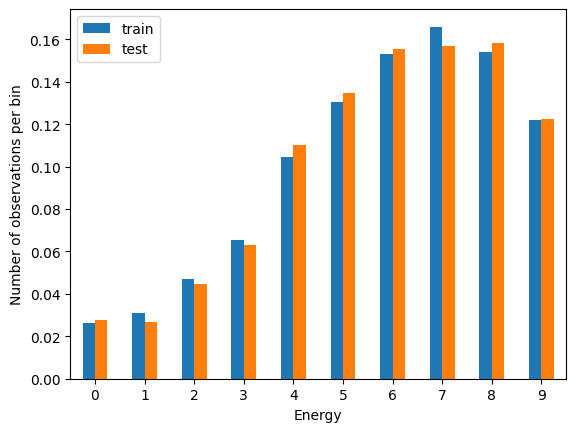

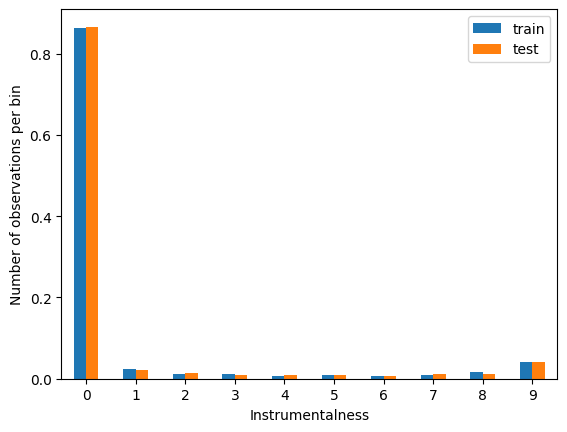

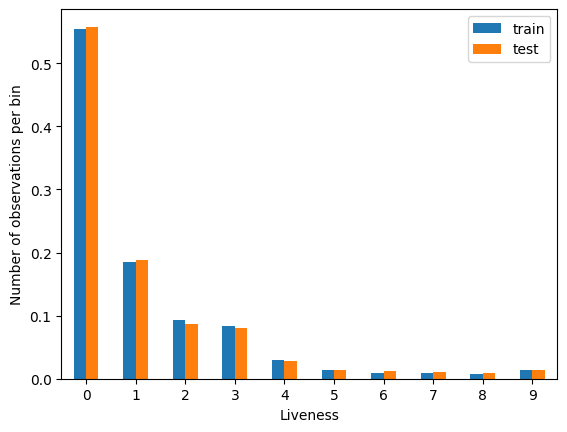

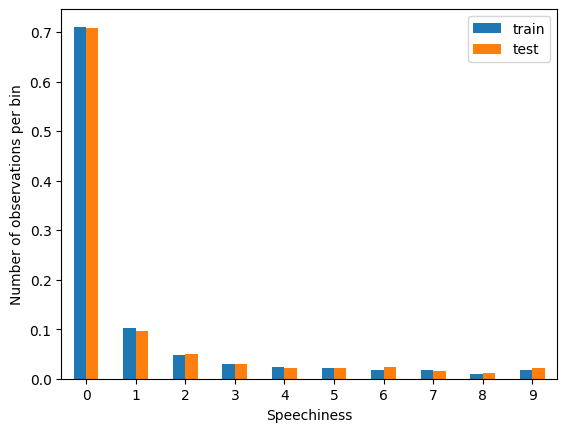

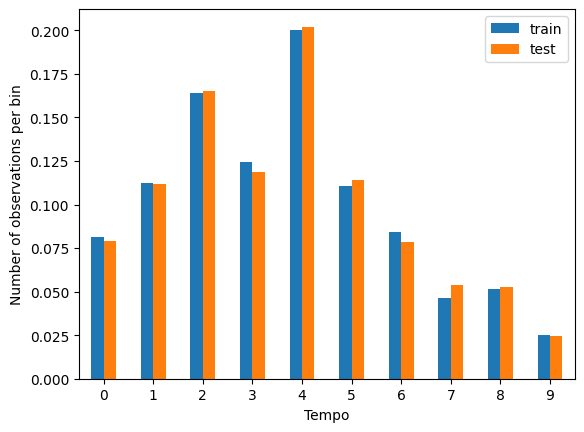

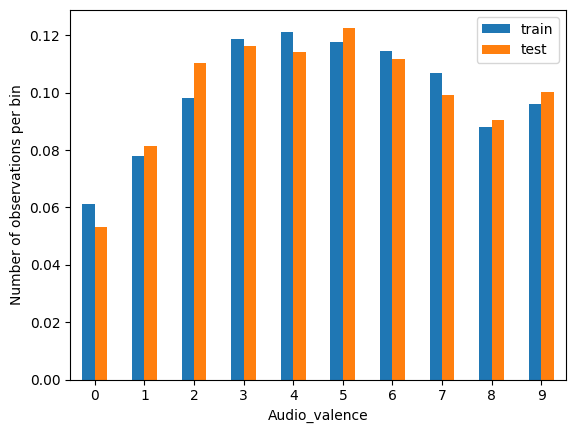

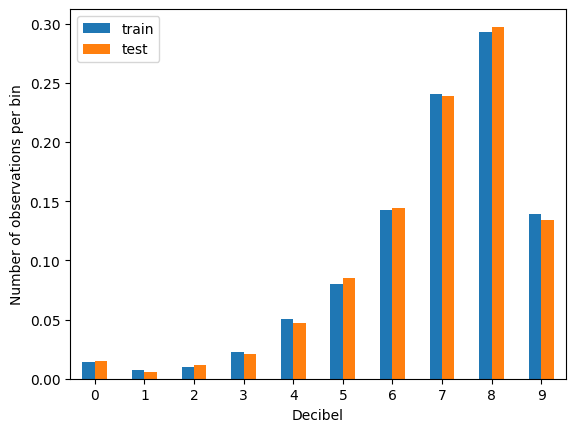

In [1824]:
for variable in X_train_discrete_.columns:
    if variable in columns:
        t1 = X_train_discrete_.groupby([variable])[variable].count() / len(X_train_discrete_)
        t2 = X_test_discrete_.groupby([variable])[variable].count() / len(X_test_discrete_)

        tmp = pd.concat([t1, t2], axis=1)
        tmp.columns = ['train', 'test']
        tmp.plot.bar()
        plt.xticks(rotation=0)
        plt.ylabel('Number of observations per bin')

### Step 8: Feature Engineer

In [1825]:
# pca = PCA()

In [1826]:
# pca.fit(X_train_discrete)

In [1827]:
# train_t = pca.transform(X_train_discrete)
# test_t = pca.transform(X_test_discrete)

In [1828]:
X_train_student_final_premodel_version = X_train_discrete
X_test_student_final_premodel_version = X_test_discrete

In [1829]:
y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [1830]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [1831]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [1832]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((12553, 32), (12553,), (5380, 32), (5380,))

In [1833]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1834]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 111.37735011487804 
 test_mse: 113.66142247540031
train_r-sq: 0.4092361786267771 
 test_r-sq: 0.40837078090402834


with one hot encoding with top 5 categories

In [1835]:
# train_mse: 112.22899102252484 
#  test_mse: 114.44377357331668
# train_r-sq: 0.40471893489167077 
#  test_r-sq: 0.4042984953471649

with pca

In [1836]:
# train_mse: 111.34599789166245 
#  test_mse: 8.631040458253338e+20
# train_r-sq: 0.4094024759859465 
#  test_r-sq: -4.492619936555281e+18

with equal width discretiser

In [1837]:
# train_mse: 115.51231221440024 
#  test_mse: 117.12212555240495
# train_r-sq: 0.3873036581580497 
#  test_r-sq: 0.3903571663074451

# with robust scaling

In [1838]:
# Was not effective for linear regression model

------------------------------------------------------------------------

# Report

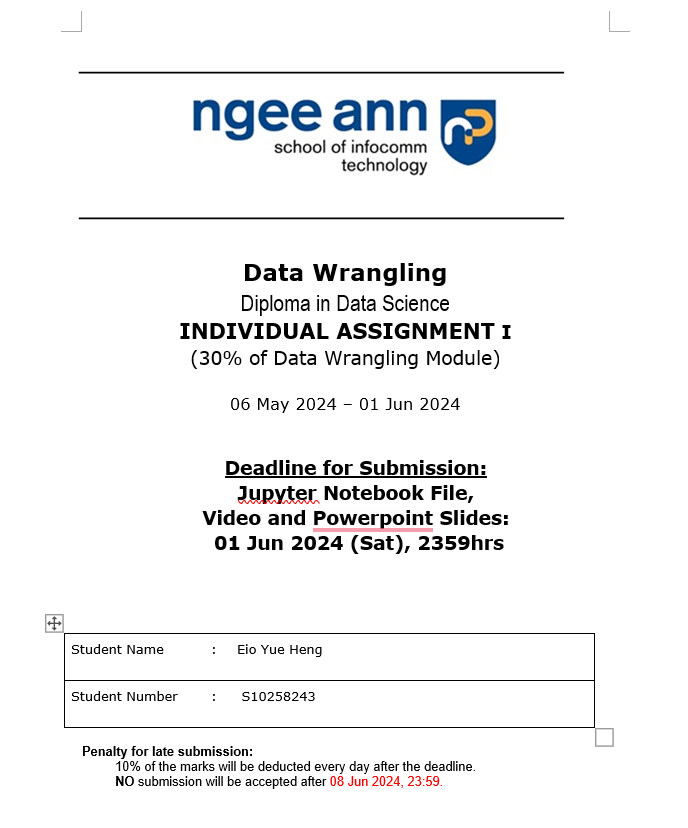

# Table of Contents

1. Problem Understanding
2. Exploratory Data Analysis
3. Data Cleansing
4. Data Transformation
5. Feature Engineer
6. Linear Regression Model
7. Summary and Further Improvements

# Problem Understanding 

The data analyst at XYZ Music Records Company is tasked with investigating the influence of various song characteristics on a song's popularity using the dataset'song_popularity.csv'. This analysis aims to provide valuable insights for the management team, helping them optimize their marketing resources and make strategic decisions in marketing, production, and distribution.

The dataset includes attributes such as song name, song_popularity, song_duration_ms, acousticness, danceability, energy, instrumentalness, speechiness, and tempo. However, the data dictionary does not provide definitions for certain attributes, such as 'Key', 'Liveness', 'Audio_mode', 'Audio_valence', 'Dynamism', 'Decibel', and 'Loudness'.

The primary objective is to predict a song's popularity based on its various attributes, uncovering patterns and relationships between the characteristics of a song and its popularity score. This will provide actionable insights that can help XYZ Music Records optimize their marketing efforts and resource allocation.

The analytical approach will follow a systematic approach: Data Cleaning to address missing values, inconsistencies, or errors in the dataset; Exploratory Data Analysis (EDA) to visualize and summarize the data to understand the distribution and relationships between variables; Feature Engineering to create new features or modify existing ones to improve the predictive power of the model; Modeling to apply various machine learning algorithms to predict song popularity and evaluate their performance; and Interpretation and Insights to derive meaningful insights and provide recommendations for the management team.

By comprehensively understanding the problem and following this structured approach, the analysis aims to provide XYZ Music Records with a clear understanding of the factors influencing a song's popularity, enabling data-driven decision-making for their marketing strategies.

# Exploratory Data Analysis 

To comprehensively understand the problem, we would have to look at the distribution of the values, the outliers, and the deviation of values from the normality of the variable. 

Firstly, looking at the variable of ‘Song_Duration_ms’, the data distribution is skewed toward the left with a normal distribution and peaks at 0,2. In the probability plot at the side of positive quantiles, values deviated from the normality which started from the positive quantile of 2 and the distance from the normality line increased exponentially reaching a top value of 1.4 on the y-axis. The boxplot shows that there are outliers on both sides, but a significant portion of them were above the upper boundary, with two extreme outlying values. 

For the variable ‘Acousticness’ the distribution of its values is also left skewed and its peak was at the very left at the value of 0.0 with a negative exponential relationship. The values in the probability plot deviated from the normality at the quantile value of -4 and 4 and only remained at the values 0 and 1 after deviating. The values form an ‘S’ shape on the plot and only coincide with the normality line on 3 occasions. As for the boxplot of ‘Acousticness’, there are no outliers, but its upper interquartile range has a greater range, and its upper boundary is of a higher value.

Variable ‘Danceability’ has a normal distribution, but its median value is extremely high as compared to its other values and peaks at a value of 0.6. For the probability plot, the values are close to the normality line most of the time except for the endpoints at the quantile values at 2 and -2. There is also an outlying point of value at -4 quantile value. Its boxplot has a rather balanced interquartile range and boundary levels, its outlying values are only present below the bottom boundary level with one extreme outlier.

Next, the variable ‘Liveness distribution of values is skewed towards the left with an extreme value in between values 100 and 150. IT increased exponentially from 100 to around 120 and decreased exponentially from around 130 to around 180 and yet again had an exponential decrease once again dropping to a value of 200. On the probability plot, the values form an ‘S’ shape and only coincide twice with the line of normality. This happens around the quantile value of 0 and 2. After deviating at the negative quantile values, the values stayed close to 200. The deviation at the positive quantiles has a strong trend upwards and reaches 400 before stopping. The boxplot indicates that this variable has a greater upper quartile range and, a larger upper boundary level. Its outliers are also only present above the upper boundary level.

The variable ‘Speechiness’ has a left-skewed distribution, and it peaks at around 100 for the histogram. It then drops from the peak value to around 200 exponentially. The probability plot for ‘Speechiness’ deviates from the normality line most of the time and only coincides with it twice. The values at the negative quantile values deviate from the normality at a gentler rate compared to the front quantile values. The deviation at the positive quantiles has a strong trend upwards and reaches around 1500 before stopping. The deviated values at the negative quantiles lay slightly above 0. For the boxplot, the has a slightly lower interquartile range and the outliers are only present above the upper boundary level with many extreme values.

The variable ‘Tempo’ has no values at both ends of the distribution. The distribution of values is somewhat similar to a normal distribution, but it is steeper for the left side of the distribution. It peaks around a value of 125. The values in the probability plot stick with the line of normality throughout the entire time except for the very end of each quantile at values of 4 and -4 and the deviation starting from the -2 value. Most of the outliers in the boxplot lie above the upper boundary level and have one extreme outlier on each side. Its upper boundary level is also slightly larger than its lower boundary level.

Next, the variable ‘Audio_valence’ has a distribution of values that is quite similar to the normal distribution. Its left side is slightly lower than its right side and therefore, has a steeper slope of values. It peaks slightly after 0.4. Its probability plot also shows that it sticks to the line of normality mostly for the middle quantiles but starts deviating from the line at values 2 and -2. There is also no distinctive difference between the interquartile ranges and its boundary levels are similar. There are also no outliers seen in the boxplot.

Finally, for the variable ‘Decibel’ Its values are skewed towards the right and have an exponential trend as can be seen from the distribution of values. However, right after peaking at around -15, it drops almost immediately to an extremely low value before it reaches 0. For its probability plot, it only sticks to the line of normality around the quantile value of 0. As the quantile values increase or decrease, the values start to deviate from the line. The deviation at the negative quantile values is more aggressive as compared to the positive quantile values and ends up reaching almost the bottom value on the y-axis. The boxplot displays that there is one outlier above the upper boundary level and the rest of the outliers are below the lower boundary level. The interquartile ranges and their boundary levels are similar too.

In summary, the dataset contains a wide variety of songs with different characteristics. The presence of outliers in several variables suggests that some songs deviate significantly from the median. The skewness of the distributions also provides insights into the characteristics of the songs, such as their ‘Acousticness’, ‘Danceability’, ‘Liveness’. These findings could be useful for further analysis or for building a recommendation system.

# Data Cleansing

Data cleansing is an essential component and step to obtaining useful and functional data for analysing relationships and correlations and predicting future trends with enough evidence using the data. It also frees up the burden of redundant data on the model and helps to optimize it as well.

For the columns that were dropped, they are ‘Code’, ‘Song_Name’, ‘Key’, and ‘Audio_mode’ for these as they are redundant and have close to no correlation to any of the significant variables that affect song popularity. As for the ‘Indicator’ variable it was removed due to it having a high correlation with energy and its correlation with other variables is similar to the correlation of the variable ‘Energy’ to other variables. There was also no information on what the variable ‘Indicator’ was the indication value of what metric and therefore, there was no contextual significance to the value in this case scenario.

Some data values were not constituted as the same data type and there were variables like ‘?’ that had to be replaced with a null value to make way for value imputation later on. The conversion of the ‘Liveness’ variable to a numeric data column was also necessary for it was assumed as a categorical data column due to it having an object data type and the presence of numerical data values and abnormal values like ‘?’. There were also duplicates in the data that had to be removed to improve the accuracy and reliability of the posterior probabilities and enable the model to make more accurate predictions on new, unseen data.

In the variable ‘Dynamism’, there were variables that made little sense like ‘l‘, ‘h’, and ‘m’. If there were no other values to refer to as we looked through the data, there was a small possibility to recognise what the values meant for were without the necessary background to know what metric dynamism is used to measure or categorised.

Dealing with the null values before handling the outliers is important. The outliers may increase or decrease based on the way we impute the values for the values might be skewed towards one side or to both sides. Hence, using the median value to impute the values has a better probability of not disrupting the distribution of the values for the extreme outliers but might affect the mean value that is being imputed which is not desired and only through transformation, scaling, etc would it preserve the distribution of values but make the relationships more visible and more useable to use in the linear regression model. For the categorical columns. The imputation method was using ‘frequent’ instead of imputing a ‘Missing’ value or ‘k-nearest neighbour’ method that does not scale well.

To handle the outliers of the other variables we have to first consider the method needed to use. There are trimming, capping, and winsorization methods. When using trimming values that are less representative of the dataset will be ignored. For capping, it retains outliers in the dataset but limits their influence. As for winsorization, it imputes those outliers with our chosen percentile and therefore replaces it with a closer value to our bottom or top percentile. Therefore, winsorization is a much more suitable method of handling the outliers than the other methods in this case scenario with multiple variables having many outliers. The use of quantiles in winsorization also seems more suitable in this case itself.

As for the rare categories in the categorical columns, I created a column for both ‘Dynamism’ and ‘Loudness’ to show which value in either column is a rare category. Rare categories are assigned a value of 1 and normal categories are assigned 0. The level of frequency that determines whether a categorical value is a rare category is at the 5th percentile. For the first 5 rows of data after the train test split, there is one row that signifies that it is a rare category which indicates that it is effective and would not compromise the data at all by grouping all the rare categories, especially the ‘Loudness’ variable for there are multiple rare categories and would cause the model to assume that all of them are rare categories and that they all have the same correlation and relationship with the same variables even though that might not be the case.


# Data Transformation

For the transformation of numerical data columns, Yeo Johnson transformation was used as there were many skewed data distributions in the dataset and to make the data distribution more normal. The use of Yeo Johnson transformation was used to inflate low variance data and deflate high variance data to create a more uniform and normal data distribution. Such variables are the variables ‘Song_Duration_ms’, ‘Liveness’, and ‘Speechiness’. Their data distribution was skewed towards the left and after transformation, there was a more normal distribution, but the data distribution was still on the left side of the histogram.

After scaling, there was also discretization being done and in this case scenario there can be two ways of doing it. There is equal width discretization and equal frequency discretization that can be implemented. For equal width discretization, all bins have equal width, or represent an equal range of the original train test split values, no matter how many cases are in each bin. This also ensures that it preserves the distribution of the data before binning. Equal frequency discretization ensures a normal distribution of data points across the range of values which enhances the handling of skewed data distribution and outliers in the train test split data. This is done by dividing the values into bins that have the same number of observations or frequency. Both discretization methods aim to reduce the complexity of data distribution and make it more manageable and more visible to easier analyse the data.

In my case, the equal width discretization method had a worse result after inputting it into the linear regression model. The equal frequency discretization method was more accurate and reliable with a smaller range in both the mean square error and the r square values. The values of r square values were higher and the mean square error values were lower. Therefore, equal frequency discretization was used for the final linear regression model.

For categorical data columns, there are many ways to encode the data. There is One hot encoding with and without top categories, ordinal encoding, etc. The encoding method that was used is one hot encoding without top categories as I believe that songs that have a rare categorical data value for that variable do not mean it cannot be a popular song and therefore it Is not suitable to implement it even though the results of the r square value and the mean square error range is smaller. As for why to use One hot encoding, one hot encoding represents categorical variables as binary columns for each category column. Label Encoding assigns a numerical value for each categorical data. Using one hot encoding also increases the dimensionality of the train test split data but label encoding does not affect the dimensionality of the train test split data. As for why not ordinal encoding, as there is no certain order on whether there is a hierarchy in the data in the categorical data column ‘Dynamism’. Through ordinal encoding, there is a possibility of imposing an ordinal relationship where no such relationship may exist between the values. This can cause problems and one hot encoding may be used instead in this case as it introduces no bias to the train test split data.


# Feature Engineer

In the context of data preprocessing for a machine learning model, selecting the appropriate scaling method is crucial for ensuring the model's performance and interpretability. Among the various scaling techniques available, each has its unique strengths and weaknesses, which should be carefully considered based on the specific characteristics of the dataset and the requirements of the model.

I opted not to use maximum absolute scaling because it scales the data to its maximum value, resulting in a distribution where the values fall within the range of -1 to 1, which could affect the train-test split data. This makes it not a suitable method for the model as it might affect the distribution of the data disproportionately and since my variables are on different scales of value, maximum absolute scaling could distort underlying correlations and patterns for the linear regression model to pick up on.

Robust scaling is designed to scale numerical input variables that contain outliers and was one of my two viable options that I wanted to implement. Even after one round of winsorization, did not yield the performance I expected even after taking care of the outliers. Hence, I chose not to use this as it did not work well with my linear regression model. This probably indicated that even though I handled the extreme outliers, the inherent distribution of the data might not have been suitable for the robust scaling method to handle.

Standard scaling was not used because it assumes the data distribution in the train-test split follows a normal distribution and then scales to unit variance, which is not the case for the data distribution of the train test split data. Additionally, it struggles to scale properly when the dataset has a large dimensionality, potentially introducing noise that could affect the model's outcome. Therefore, standard scaling is not a suitable choice in this as well.

Min max scaling was chosen and executed because it preserves the shape of the original data distribution while bringing the values within the desired range. This is particularly useful since the distribution of data for most values is not normal. Moreover, it can handle varying scales or outliers, which is beneficial in this case due to the different metrics for each variable that could potentially alter the output dataset. Additionally, it helps maintain the relative difference between variables, which helps to increase model performance.

Regarding additional features, the use of principal component analysis (PCA) was considered but it was quickly dismissed as not necessary as it didn't work well with my model, reducing the dimensionality of my train-test split data to the point where the R-square value for the test data was -4.492619936555281e+18 and the mean square error range was at least 103, rendering it unsatisfactory for prediction based on any variables. This meant that the reduction of the dimensionality resulted in a loss of information and greatly affected the test side of the split data, rendering PCA ineffective for the linear regression model.

Given the challenges and the outcomes of various scaling and feature engineering techniques, I have yet to identify additional features that could enhance the model's performance. The current approach with min max scaling appears to be the most effective for me in preserving the data's characteristics while facilitating accurate predictions. However, continuous exploration of feature engineering techniques and advanced scaling methods remains essential for further optimizing the model's performance.


# Linear Regression Model

The linear regression model was evaluated using both mean square error and r square metrics on the training and testing datasets. The mean square error results indicate the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower mean square error signifies better performance. For this model, the training mean square error and test mean square error can be compared to assess how well the model fits the training data and its ability to generalize to unseen data. The r square score measures the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate a better fit.

The advantages of using linear regression include its simplicity and interpretability. The model is straightforward to implement and provides coefficients that directly indicate the relationship between each independent variable and the dependent variable, making it easy to understand the influence of different predictors. Additionally, linear regression can be computationally efficient, especially with smaller datasets or when the relationship between variables is approximately linear.

However, the disadvantages become apparent if the mean square error on the test set is significantly higher than on the training set, indicating overfitting, or if the r square value is substantially lower for the test set compared to the training set, suggesting poor generalization. Linear regression assumes a linear relationship between the predictors and the response variable, which may not always hold, leading to suboptimal performance. Furthermore, it is sensitive to outliers, which can disproportionately affect the model's predictions. If the dataset contains multicollinearity, the coefficients may become unstable, affecting the model's reliability.

In summary, while the linear regression model offers clarity and ease of use, its effectiveness depends on the nature of the dataset and the underlying assumptions. The evaluation metrics provide a snapshot of the model's performance, highlighting its strengths and potential limitations in capturing complex patterns within the data.

# Summary and Further Improvements

To improve the linear regression model, several strategies can be employed. First, feature engineering and selection can be improved by creating interaction terms and polynomial features, leveraging domain knowledge to introduce new features and remove irrelevant ones. Addressing multicollinearity can be achieved by calculating the Variance Inflation Factor (VIF) or applying Principal Component Analysis (PCA). Handling outliers through winsorization or robust regression techniques like RANSAC or Huber regression can mitigate their impact. Regularization techniques like Ridge (L2) and Lasso (L1) regression can reduce overfitting and stabilize the model. Implementing k-fold cross-validation ensures consistent performance across different data subsets. Grid search can optimize hyperparameters. Improving data quality through thorough cleaning and appropriate scaling methods refines the model. Exploring advanced models like Random Forest, Gradient Boosting, or XGBoost, and considering neural networks for larger datasets can capture complex patterns and non-linear relationships that linear regression might miss. By systematically applying these strategies, the linear regression model can achieve more accurate and reliable predictions.